Project Title: Twitch and Steam: A Data-Driven Exploration of Video Game Streaming

The rise of eSports and video game streaming has caught my eye, and I've noticed that there's a wealth of data out there that we can use to better understand this rapidly evolving landscape. The heart of this project lies in exploring and analyzing data from Twitch.tv, a premier live streaming platform for gamers, and juxtaposing it with data from Steam, a leading platform for video game distribution.

My goal is to dive deep into the data and uncover the relationship between game popularity, usage metrics, and genre preferences. I've centered my analysis around the following questions that piqued my curiosity:

What's the trend in streaming and viewing hours for the top 5 games on Twitch over the years?

If we compare the top games on Twitch, how do they stand in terms of hours streamed, peak viewers, and average viewers?

What game genres are favorites among streamers and viewers? How does their review score compare?

Can the review score of a game predict its performance on Twitch (e.g., streaming hours, peak viewers)?

Through this project, I hope to uncover insights that could be of interest not just to me, but to game developers, streaming content creators, advertisers, and even fellow gaming enthusiasts. To do this, I'll be using SQL to extract and manipulate data, and Python for analyzing and visualizing it.

In [428]:
!pip install pandas


In [429]:
import pandas as pd

# upload data
video_games_df = pd.read_csv('C:/Users/44737/Desktop/output.csv')
twitch_df = pd.read_csv('C:/Users/44737/Desktop/twitch_game_data.csv', encoding='ISO-8859-1')


In [430]:
import sqlite3

# connect to the SQLite database
conn = sqlite3.connect(':memory:')

# create new database tables from  pandas dataframes
video_games_df.to_sql('video_games', conn, index=False)
twitch_df.to_sql('twitch', conn, index=False)


17400

In [431]:
# first five lines video game
query = """
SELECT *
FROM video_games
LIMIT 5
"""

df = pd.read_sql_query(query, conn)
df


Name   
0                     Borderlands 3  \
1                       Dying Light   
2       Middle-Earth: Shadow of War   
3  Counter-Strike: Global Offensive   
4               Grand Theft Auto IV   

                                               Stats  steam_app_id   
0  {'Additional Content': {"Moxxi's Heist of the ...      397540.0  \
1  {'Additional Content': {'The Following': {'Pol...      239140.0   
2  {'Additional Content': {'Blade of Galadriel': ...      356190.0   
3  {'Multi-Player': {'Co-Op': {'Polled': '34', 'A...         730.0   
4  {'Additional Content': {'The Lost and Damned':...        5152.0   

  Release_date                                          Genres  Review_score  
0   2019-09-13                   First-Person, Action, Shooter            76  
1   2015-01-27  Action, Adventure, Open World, Survival Horror            78  
2   2017-10-10                               Action, Adventure            76  
3   2012-08-21                           First-Person, Shooter            74  
4   2008-04-29          Third-Person, Action, Sandbox, Shooter            82

In [432]:
# first five lines twitch data
query = """
SELECT *
FROM twitch
LIMIT 5
"""

df = pd.read_sql_query(query, conn)
df

Rank                              Game  Month  Year  Hours_watched   
0     1                 League of Legends      1  2016       94377226  \
1     2  Counter-Strike: Global Offensive      1  2016       47832863   
2     3                            Dota 2      1  2016       45185893   
3     4                       Hearthstone      1  2016       39936159   
4     5       Call of Duty: Black Ops III      1  2016       16153057   

   Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers   
0         1362044        530270           2903     129172       127021  \
1          830105        372654           2197     120849        64378   
2          433397        315083           1100      44074        60815   
3          235903        131357            517      36170        53749   
4         1151578         71639           3620     214054        21740   

   Avg_channels  Avg_viewer_ratio  
0          1833             69.29  
1          1117             57.62  
2           583            104.26  
3           317            169.29  
4          1549             14.03

In [433]:
query = """
SELECT name 
FROM sqlite_master 
WHERE type ='table' 
AND name NOT LIKE 'sqlite_%';
"""
df = pd.read_sql_query(query, conn)
print(df)



          name
0  video_games
1       twitch


In [434]:
# double check loaded correctly
query = """
SELECT *
FROM twitch
LIMIT 5
"""
df = pd.read_sql_query(query, conn)
print(df)

query = """
SELECT *
FROM video_games
LIMIT 5
"""
df = pd.read_sql_query(query, conn)
print(df)


   Rank                              Game  Month  Year  Hours_watched   
0     1                 League of Legends      1  2016       94377226  \
1     2  Counter-Strike: Global Offensive      1  2016       47832863   
2     3                            Dota 2      1  2016       45185893   
3     4                       Hearthstone      1  2016       39936159   
4     5       Call of Duty: Black Ops III      1  2016       16153057   

   Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers   
0         1362044        530270           2903     129172       127021  \
1          830105        372654           2197     120849        64378   
2          433397        315083           1100      44074        60815   
3          235903        131357            517      36170        53749   
4         1151578         71639           3620     214054        21740   

   Avg_channels  Avg_viewer_ratio  
0          1833             69.29  
1          1117             57.62  
2       

Analysis Section

Trend Analysis:
How have the hours watched and streamed for the top 5 games changed over the years?

Comparative Analysis:
How do the top games on Twitch compare in terms of hours watched, hours streamed, peak viewers, peak channels, and average viewers?

Popularity of Genres:
What genres are most popular among streamers and viewers, and how do they compare in terms of review score?

Performance Indicators:
How well does the review score of a game correlate with its performance on Twitch (hours watched, peak viewers, etc.)?

Trend Analysis: How have the hours watched and streamed for the top 5 games changed over the years?

In [435]:
# group by game and year
query = """
    SELECT Game, Year, SUM(Hours_watched) as Total_Watched, SUM(Hours_streamed) as Total_Streamed
    FROM twitch
    WHERE Game IN (SELECT Game FROM twitch ORDER BY Hours_watched DESC LIMIT 5)
    GROUP BY Game, Year
    ORDER BY Year
"""

df = pd.read_sql_query(query, conn)
# Shift the index
df.index = df.index + 1
print(df)

             Game  Year  Total_Watched  Total_Streamed
1   Just Chatting  2018      141303847         1699513
2   Just Chatting  2019      759733055        11417560
3   Just Chatting  2020     1995891029        28458987
4        VALORANT  2020      814503048        28228125
5   Just Chatting  2021     3020771657        38697240
6        VALORANT  2021      950822193        36958153
7   Just Chatting  2022     3139111208        35454882
8        VALORANT  2022     1159768684        43142243
9   Just Chatting  2023      802312029         8528373
10       VALORANT  2023      268399194        10797502


In [436]:
# group by game and year
query = """
    SELECT Game, Year, SUM(Hours_watched) as Total_Watched, SUM(Hours_streamed) as Total_Streamed
    FROM twitch
    WHERE Game IN (SELECT Game FROM twitch WHERE Game != 'Just Chatting' ORDER BY Hours_watched DESC LIMIT 5)
    GROUP BY Game, Year
    ORDER BY Year
"""

df = pd.read_sql_query(query, conn)
# Shift the index
df.index = df.index + 1
print(df)

                  Game  Year  Total_Watched  Total_Streamed
1   Grand Theft Auto V  2016       35570774         4047957
2    League of Legends  2016     1035469850        14057492
3                 Rust  2016       18232777          622449
4   Grand Theft Auto V  2017      122232186         3753095
5    League of Legends  2017     1022398595        15163801
6                 Rust  2017       21650592          820185
7   Grand Theft Auto V  2018      147224251         4092758
8    League of Legends  2018      985380685        18570999
9                 Rust  2018       26168480         1098058
10  Grand Theft Auto V  2019      578915864         7808277
11   League of Legends  2019     1118435546        24463648
12                Rust  2019       31304440         1470787
13  Grand Theft Auto V  2020      824227402        16894705
14   League of Legends  2020     1553536532        38273316
15                Rust  2020       65961659         2212293
16            VALORANT  2020      814503

In [437]:
# top 5 unique games based on total hours watched across all years
# aggregate all rows by game and calculate the total hours watched for each game
query = """
    SELECT Game, SUM(Hours_watched) as Total_Watched, SUM(Hours_streamed) as Total_Streamed
    FROM twitch
    
    GROUP BY Game 
    ORDER BY Total_Watched DESC
    LIMIT 5
"""

df = pd.read_sql_query(query, conn)

# Shift the index
df.index = df.index + 1
print(df)

                               Game  Total_Watched  Total_Streamed
1                     Just Chatting     9859122825       124256555
2                 League of Legends     9370061528       183033950
3                Grand Theft Auto V     5311617139        91894647
4                          Fortnite     5270720577       356677881
5  Counter-Strike: Global Offensive     4146563160        78468620


In [438]:
# top 5 unique games based on total hours watched across all years
# aggregate all rows by game and calculate the total hours watched for each game
query = """
    SELECT Game, SUM(Hours_watched) as Total_Watched, SUM(Hours_streamed) as Total_Streamed
    FROM twitch
    WHERE Game != 'Just Chatting'
    GROUP BY Game 
    ORDER BY Total_Watched DESC
    LIMIT 5
"""

df = pd.read_sql_query(query, conn)

# Shift the index
df.index = df.index + 1
print(df)

                               Game  Total_Watched  Total_Streamed
1                 League of Legends     9370061528       183033950
2                Grand Theft Auto V     5311617139        91894647
3                          Fortnite     5270720577       356677881
4  Counter-Strike: Global Offensive     4146563160        78468620
5                            Dota 2     3660163488        43133713


In [439]:
query = """
SELECT Game, Year, SUM(Hours_watched) as Total_Watched
FROM twitch
WHERE Game != 'Just Chatting'
GROUP BY Game, Year
ORDER BY Year, Total_Watched DESC
"""

# Execute the query
df = pd.read_sql_query(query, conn)

# Create a column that ranks games by hours watched each year
df['rn'] = df.groupby('Year')['Total_Watched'].rank(method='first', ascending=False)

# Filter for the top 5 games each year
df = df[df['rn'] <= 5]

# Shift the index
df.index = df.index + 1

df


Game  Year  Total_Watched   rn
1                    League of Legends  2016     1035469850  1.0
2     Counter-Strike: Global Offensive  2016      526391918  2.0
3                               Dota 2  2016      496585969  3.0
4                          Hearthstone  2016      474016816  4.0
5                            Overwatch  2016      178952454  5.0
621                  League of Legends  2017     1022398595  1.0
622      PLAYERUNKNOWN'S BATTLEGROUNDS  2017      539829453  2.0
623                             Dota 2  2017      449879503  3.0
624                        Hearthstone  2017      442752554  4.0
625   Counter-Strike: Global Offensive  2017      419802259  5.0
1218                          Fortnite  2018     1358048914  1.0
1219                 League of Legends  2018      985380685  2.0
1220                            Dota 2  2018      472414819  3.0
1221     PLAYERUNKNOWN'S BATTLEGROUNDS  2018      454157076  4.0
1222  Counter-Strike: Global Offensive  2018      401775324  5.0
1803                 League of Legends  2019     1118435546  1.0
1804                          Fortnite  2019     1054128758  2.0
1805                Grand Theft Auto V  2019      578915864  3.0
1806                            Dota 2  2019      503022570  4.0
1807  Counter-Strike: Global Offensive  2019      457874735  5.0
2323                 League of Legends  2020     1553536532  1.0
2324                          Fortnite  2020     1066892854  2.0
2325                Grand Theft Auto V  2020      824227402  3.0
2326                          VALORANT  2020      814503048  4.0
2327             Call of Duty: Warzone  2020      811380708  5.0
2825                Grand Theft Auto V  2021     1874989023  1.0
2826                 League of Legends  2021     1735661105  2.0
2827                          Fortnite  2021      966514114  3.0
2828                          VALORANT  2021      950822193  4.0
2829                         Minecraft  2021      863349000  5.0
3317                 League of Legends  2022     1556699612  1.0
3318                Grand Theft Auto V  2022     1414287042  2.0
3319                          VALORANT  2022     1159768684  3.0
3320  Counter-Strike: Global Offensive  2022      699783949  4.0
3321                      Apex Legends  2022      658477617  5.0
3784                 League of Legends  2023      362479603  1.0
3785                Grand Theft Auto V  2023      314170597  2.0
3786                          VALORANT  2023      268399194  3.0
3787                         Minecraft  2023      169010068  4.0
3788  Counter-Strike: Global Offensive  2023      159677994  5.0

Fortnite's Rise and Fall: Fortnite notably leaps to the top spot in 2018, surpassing League of Legends, only to fall to the second position in 2019 and third by 2021. This suggests a decline in Fortnite's popularity over time, although it continues to remain in the top 5.

League of Legends' Endurance: League of Legends consistently remains in the top two most-watched games, even reclaiming its top spot in 2019 after being briefly surpassed by Fortnite in 2018. This points to League's popularity and commited audience.

Grand Theft Auto V's Growth: The game steadily climbs up the ranks from 2019, where it was the third most-watched game and in 2021 when it became the most-watched game. This indicates a significant growth in popularity for Grand Theft Auto V.

Emergence of New Games: Some newer games like Valorant and Call of Duty: Warzone enter the top 5 in 2020, suggesting an influx of new content that has attracted viewers.

Important note on all data: 2023 numbers are not final

In [440]:
!pip install matplotlib

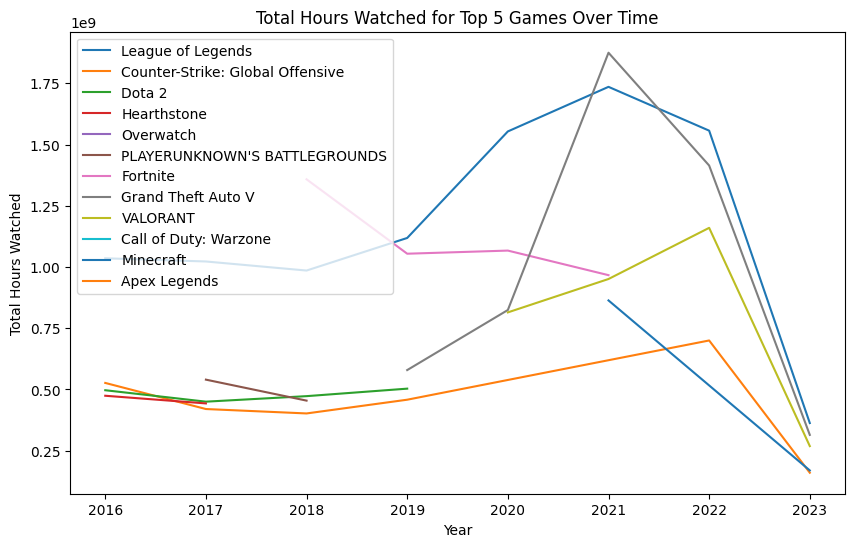

In [441]:
import matplotlib.pyplot as plt

# ensure DataFrame sorted by year
df = df.sort_values('Year')

# create a list of the top 5 games
top_games = df['Game'].unique()

plt.figure(figsize=(10, 6))

# plot a line for each game
for game in top_games:
    game_df = df[df['Game'] == game]
    plt.plot(game_df['Year'], game_df['Total_Watched'], label=game)

plt.title('Total Hours Watched for Top 5 Games Over Time')
plt.xlabel('Year')
plt.ylabel('Total Hours Watched')
plt.legend(loc='upper left')
plt.show()

In [442]:
print(df.columns)

Index(['Game', 'Year', 'Total_Watched', 'rn'], dtype='object')


In [443]:
query = "SELECT * FROM twitch"
twitch = pd.read_sql_query(query, conn)
print(twitch.head())

   Rank                              Game  Month  Year  Hours_watched   
0     1                 League of Legends      1  2016       94377226  \
1     2  Counter-Strike: Global Offensive      1  2016       47832863   
2     3                            Dota 2      1  2016       45185893   
3     4                       Hearthstone      1  2016       39936159   
4     5       Call of Duty: Black Ops III      1  2016       16153057   

   Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers   
0         1362044        530270           2903     129172       127021  \
1          830105        372654           2197     120849        64378   
2          433397        315083           1100      44074        60815   
3          235903        131357            517      36170        53749   
4         1151578         71639           3620     214054        21740   

   Avg_channels  Avg_viewer_ratio  
0          1833             69.29  
1          1117             57.62  
2       

In [444]:
import pandas as pd
import sqlite3

# Establish a connection to database
conn = sqlite3.connect('database_path.db')

# QL query
query = "SELECT * FROM twitch"

# Load the data into a DataFrame
twitch = pd.read_sql_query(query, conn)

# view the first few rows of your DataFrame
print(twitch.head())

   Rank                              Game  Month  Year  Hours_watched   
0     1                 League of Legends      1  2016       94377226  \
1     2  Counter-Strike: Global Offensive      1  2016       47832863   
2     3                            Dota 2      1  2016       45185893   
3     4                       Hearthstone      1  2016       39936159   
4     5       Call of Duty: Black Ops III      1  2016       16153057   

   Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers   
0         1362044        530270           2903     129172       127021  \
1          830105        372654           2197     120849        64378   
2          433397        315083           1100      44074        60815   
3          235903        131357            517      36170        53749   
4         1151578         71639           3620     214054        21740   

   Avg_channels  Avg_viewer_ratio  
0          1833             69.29  
1          1117             57.62  
2       

In [445]:
# create new database tables from pandas dataframes
video_games_df.to_sql('video_games', conn, if_exists='replace', index=False)
twitch_df.to_sql('twitch', conn, if_exists='replace', index=False)

17400

In [446]:
query = "SELECT * FROM twitch"
twitch = pd.read_sql_query(query, conn)
print(twitch.head())

   Rank                              Game  Month  Year  Hours_watched   
0     1                 League of Legends      1  2016       94377226  \
1     2  Counter-Strike: Global Offensive      1  2016       47832863   
2     3                            Dota 2      1  2016       45185893   
3     4                       Hearthstone      1  2016       39936159   
4     5       Call of Duty: Black Ops III      1  2016       16153057   

   Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers   
0         1362044        530270           2903     129172       127021  \
1          830105        372654           2197     120849        64378   
2          433397        315083           1100      44074        60815   
3          235903        131357            517      36170        53749   
4         1151578         71639           3620     214054        21740   

   Avg_channels  Avg_viewer_ratio  
0          1833             69.29  
1          1117             57.62  
2       

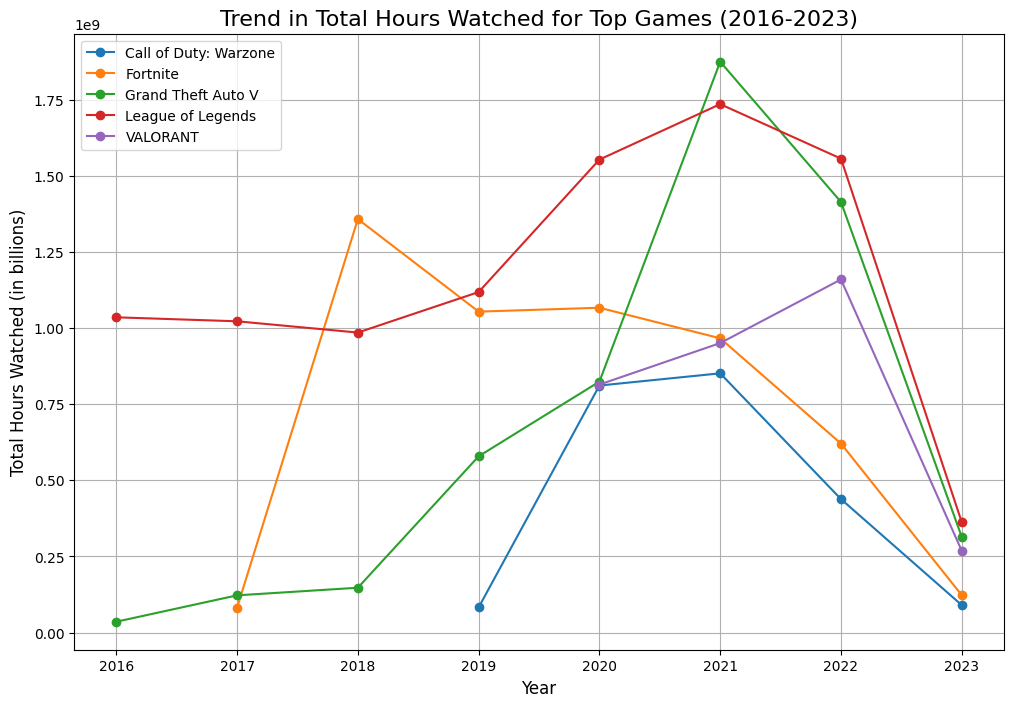

In [447]:
import matplotlib.pyplot as plt

# select data for the specified games and years
query = """
    SELECT Game, Year, SUM(Hours_watched) as Total_Watched
    FROM twitch
    WHERE Game IN ('Fortnite', 'League of Legends', 'Grand Theft Auto V', 'VALORANT', 'Call of Duty: Warzone')
    GROUP BY Game, Year
    ORDER BY Year
"""

df = pd.read_sql_query(query, conn)

# Pivot the dataframe for easier plotting
df_pivot = df.pivot(index='Year', columns='Game', values='Total_Watched')

# Generate the plot
plt.figure(figsize=(12, 8))
for game in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[game], marker='o', label=game)

plt.title('Trend in Total Hours Watched for Top Games (2016-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Hours Watched (in billions)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

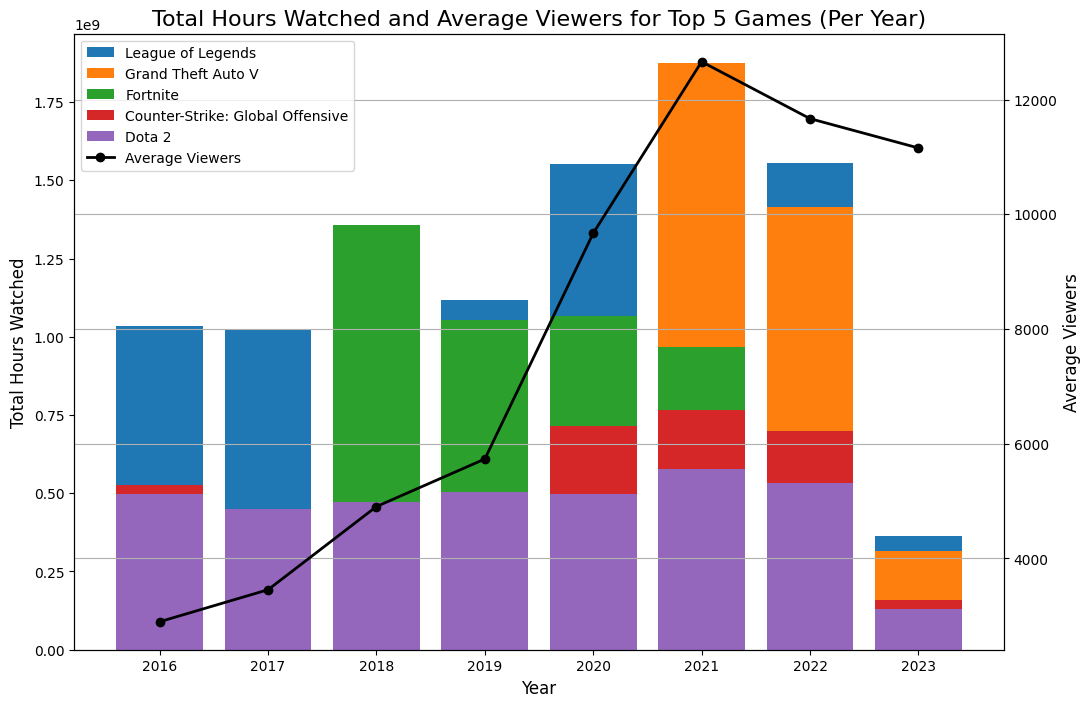

In [448]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate overall average viewers for each year
avg_viewers = twitch_df['Avg_viewers'].groupby(twitch_df['Year']).mean().reset_index()

# Find top 5 games based on total hours watched
top_games = hours_watched.groupby('Game')['Hours_watched'].sum().nlargest(5).index.tolist()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Filtering and plotting for each game
for game in top_games:
    data = hours_watched[hours_watched['Game'] == game]
    
    # Bar plot for total hours watched
    ax1.bar(data['Year'], data['Hours_watched'], label=game)

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Line plot for overall average viewers on the secondary y-axis
ax2.plot(avg_viewers['Year'], avg_viewers['Avg_viewers'], color='black', marker='o', linewidth=2, label='Average Viewers')

ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.grid(True)
plt.show()


Now let's check the same thing, but for the top five games per year

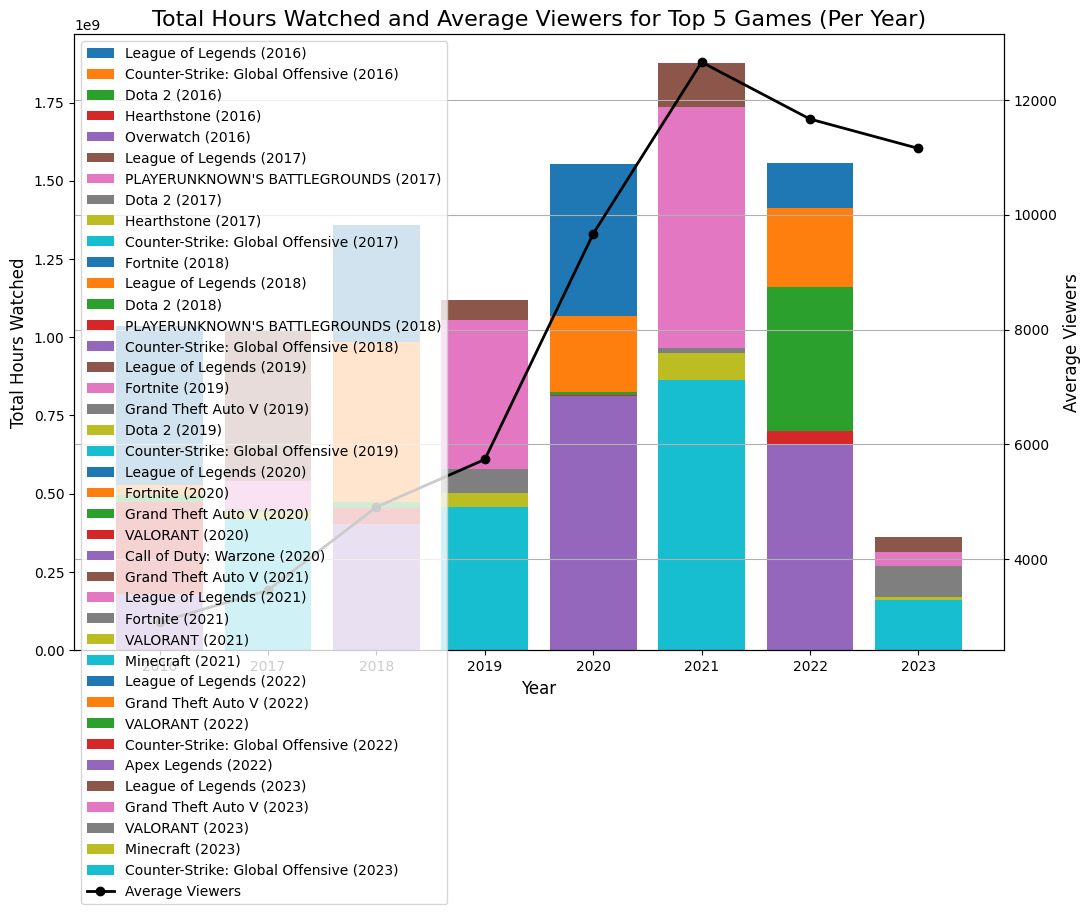

In [449]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate overall average viewers for each year
avg_viewers = twitch_df['Avg_viewers'].groupby(twitch_df['Year']).mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Filtering and plotting for each year
for year in hours_watched['Year'].unique():
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    
    for game in top_games:
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]
        
        # Bar plot for total hours watched
        ax1.bar(data['Year'], data['Hours_watched'], label=f'{game} ({year})')

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Line plot for overall average viewers on the secondary y-axis
ax2.plot(avg_viewers['Year'], avg_viewers['Avg_viewers'], color='black', marker='o', linewidth=2, label='Average Viewers')

ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()


Whoops, let's fix that legend and condense each game per year into the same category

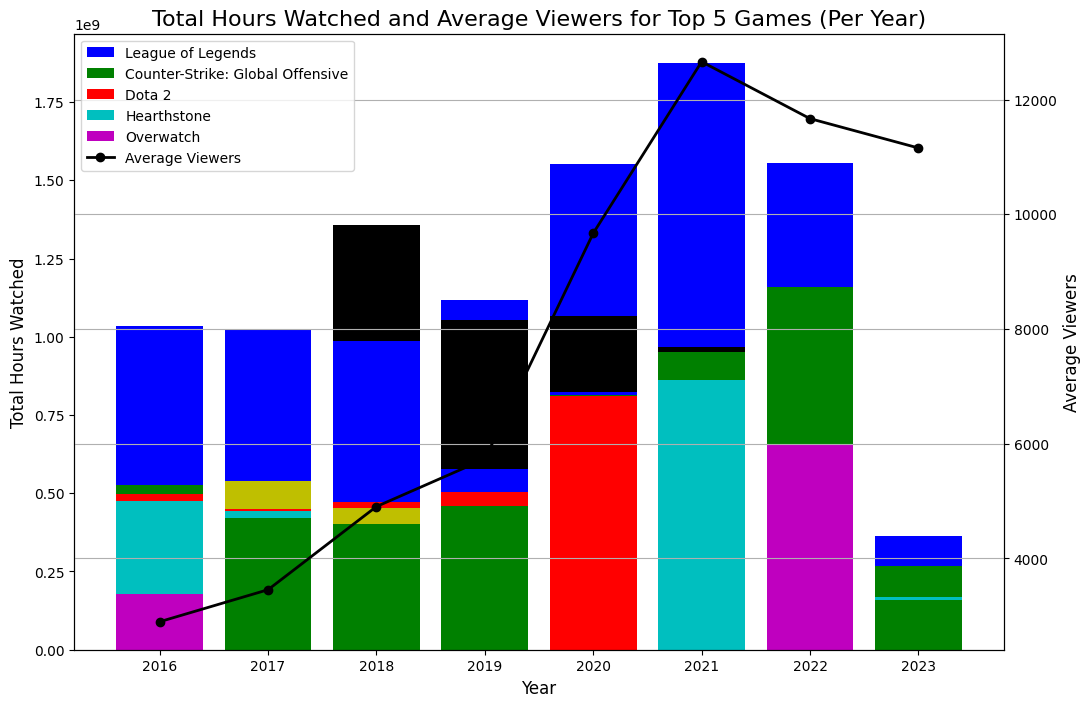

In [450]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate overall average viewers for each year
avg_viewers = twitch_df['Avg_viewers'].groupby(twitch_df['Year']).mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create color dictionary for unique game-color pairs
color_dict = {}

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Filtering and plotting for each year
for year in hours_watched['Year'].unique():
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    
    for game in top_games:
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]
        
        # Bar plot for total hours watched
        ax1.bar(data['Year'], data['Hours_watched'], color=color_dict[game], label=game if year == hours_watched['Year'].min() else "")

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Line plot for overall average viewers on the secondary y-axis
ax2.plot(avg_viewers['Year'], avg_viewers['Avg_viewers'], color='black', marker='o', linewidth=2, label='Average Viewers')

ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()

grouped bar chart will probably be easier to interpret. 

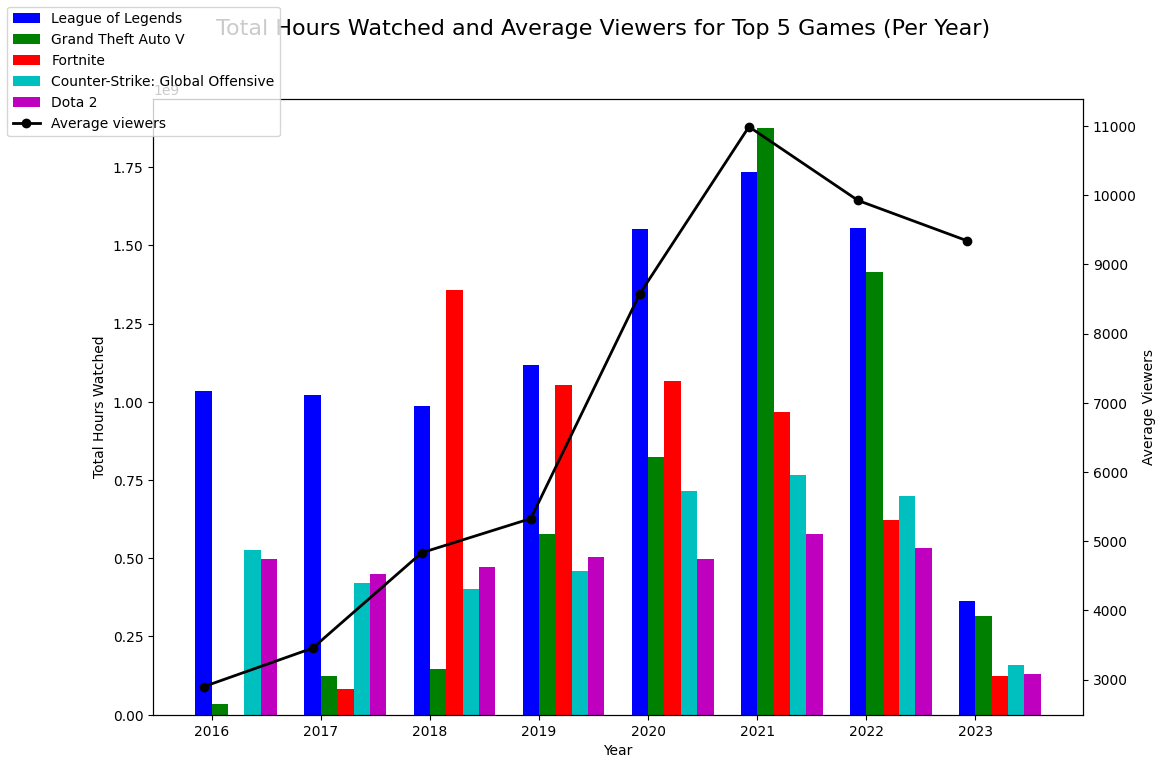

In [451]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exclude 'Just Chatting'
twitch_df = twitch_df[twitch_df['Game'] != 'Just Chatting']

# Calculate total hours watched for each game, per year
hours_watched = twitch_df.groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate overall average viewers for each year
avg_viewers = twitch_df.groupby('Year')['Avg_viewers'].mean().reset_index()

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Get the top 5 games over all years
top_games = hours_watched.groupby('Game')['Hours_watched'].sum().nlargest(5).index

# Define list of colors
colors = ['b', 'g', 'r', 'c', 'm']

# Define width of each bar
bar_width = 0.15

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Create a new dataframe that includes all possible combinations of Year and Game
all_combinations = pd.MultiIndex.from_product([unique_years, top_games], names = ["Year", "Game"]).to_frame(index=False)

# Merge with the original dataframe to fill in missing combinations with zero
hours_watched = all_combinations.merge(hours_watched, how='left', on=['Year', 'Game']).fillna(0)

# Create new figure
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot bars for each game
for i, game in enumerate(top_games):
    game_data = hours_watched[hours_watched['Game'] == game]
    ax1.bar(bar_positions + i*bar_width, game_data['Hours_watched'], width=bar_width, color=colors[i], align='center', label=game)

# Plot average viewers on secondary axis
ax2 = ax1.twinx()
ax2.plot(bar_positions, avg_viewers['Avg_viewers'], color='black', marker='o', linewidth=2, label='Average viewers')

# Formatting
ax1.set_xticks(bar_positions + bar_width / 2)
ax1.set_xticklabels(unique_years)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Hours Watched')
ax2.set_ylabel('Average Viewers')
fig.suptitle('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)
fig.legend(loc="upper left")
plt.show()


Need to get the top five games per year. 

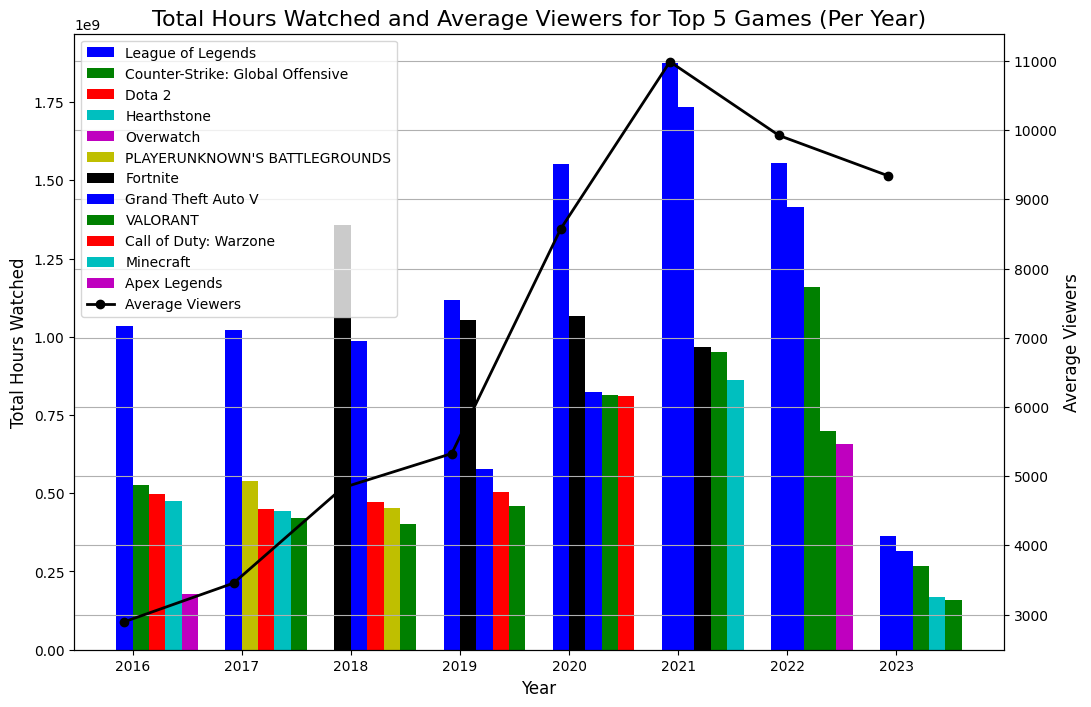

In [452]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate overall average viewers for each year
avg_viewers = twitch_df.groupby('Year')['Avg_viewers'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create color dictionary for unique game-color pairs
color_dict = {}

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create width for each bar
bar_width = 0.15

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Filtering and plotting for each year
for i, year in enumerate(hours_watched['Year'].unique()):
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    
    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]
        
        # Bar plot for total hours watched
        ax1.bar(bar_positions[i] + j*bar_width, data['Hours_watched'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Line plot for overall average viewers on the secondary y-axis
ax2.plot(bar_positions, avg_viewers['Avg_viewers'], color='black', marker='o', linewidth=2, label='Average Viewers')

# Formatting
ax1.set_xticks(bar_positions + bar_width / 2)
ax1.set_xticklabels(unique_years)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)
ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()


Right, now let's change the colors so each one has a unique color. Let's look up some color codes

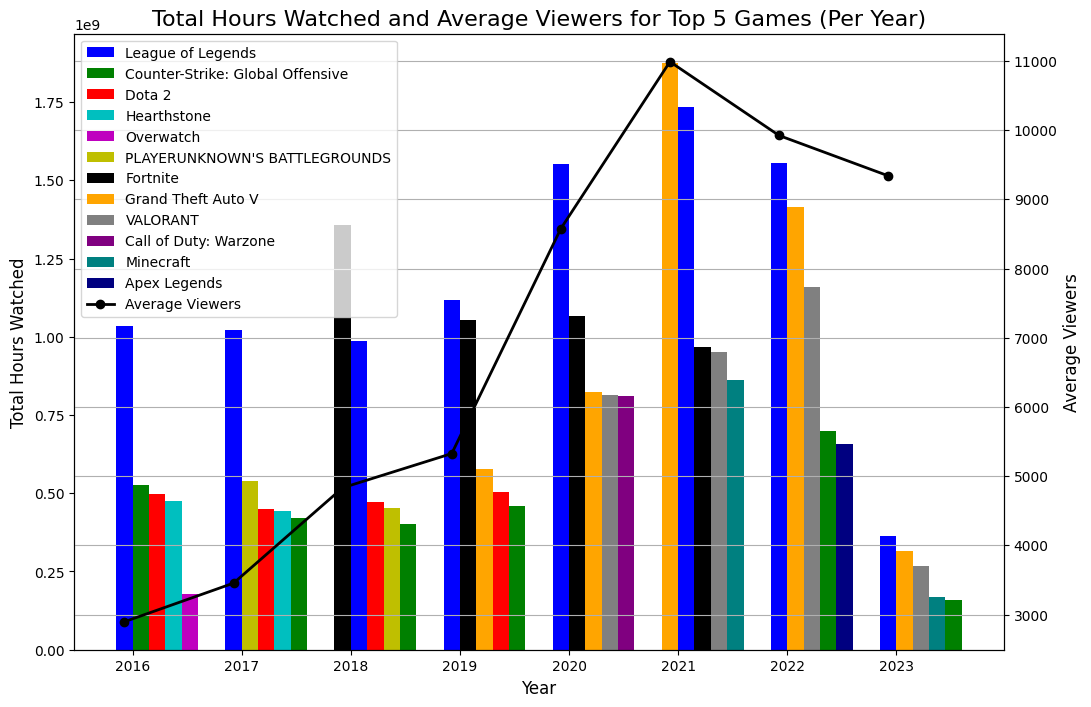

In [453]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate overall average viewers for each year
avg_viewers = twitch_df.groupby('Year')['Avg_viewers'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create color dictionary for unique game-color pairs
color_dict = {}

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Create width for each bar
bar_width = 0.15

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Filtering and plotting for each year
for i, year in enumerate(hours_watched['Year'].unique()):
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    
    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]
        
        # Bar plot for total hours watched
        ax1.bar(bar_positions[i] + j*bar_width, data['Hours_watched'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Line plot for overall average viewers on the secondary y-axis
ax2.plot(bar_positions, avg_viewers['Avg_viewers'], color='black', marker='o', linewidth=2, label='Average Viewers')

# Formatting
ax1.set_xticks(bar_positions + bar_width / 2)
ax1.set_xticklabels(unique_years)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)
ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()


As noted before, remember 2023 is not total for the entire year.

average viewer rate increasing substantially from 2019 to 2020 and 2021, probably due to covid. 

Now let's check the average viewer for each game

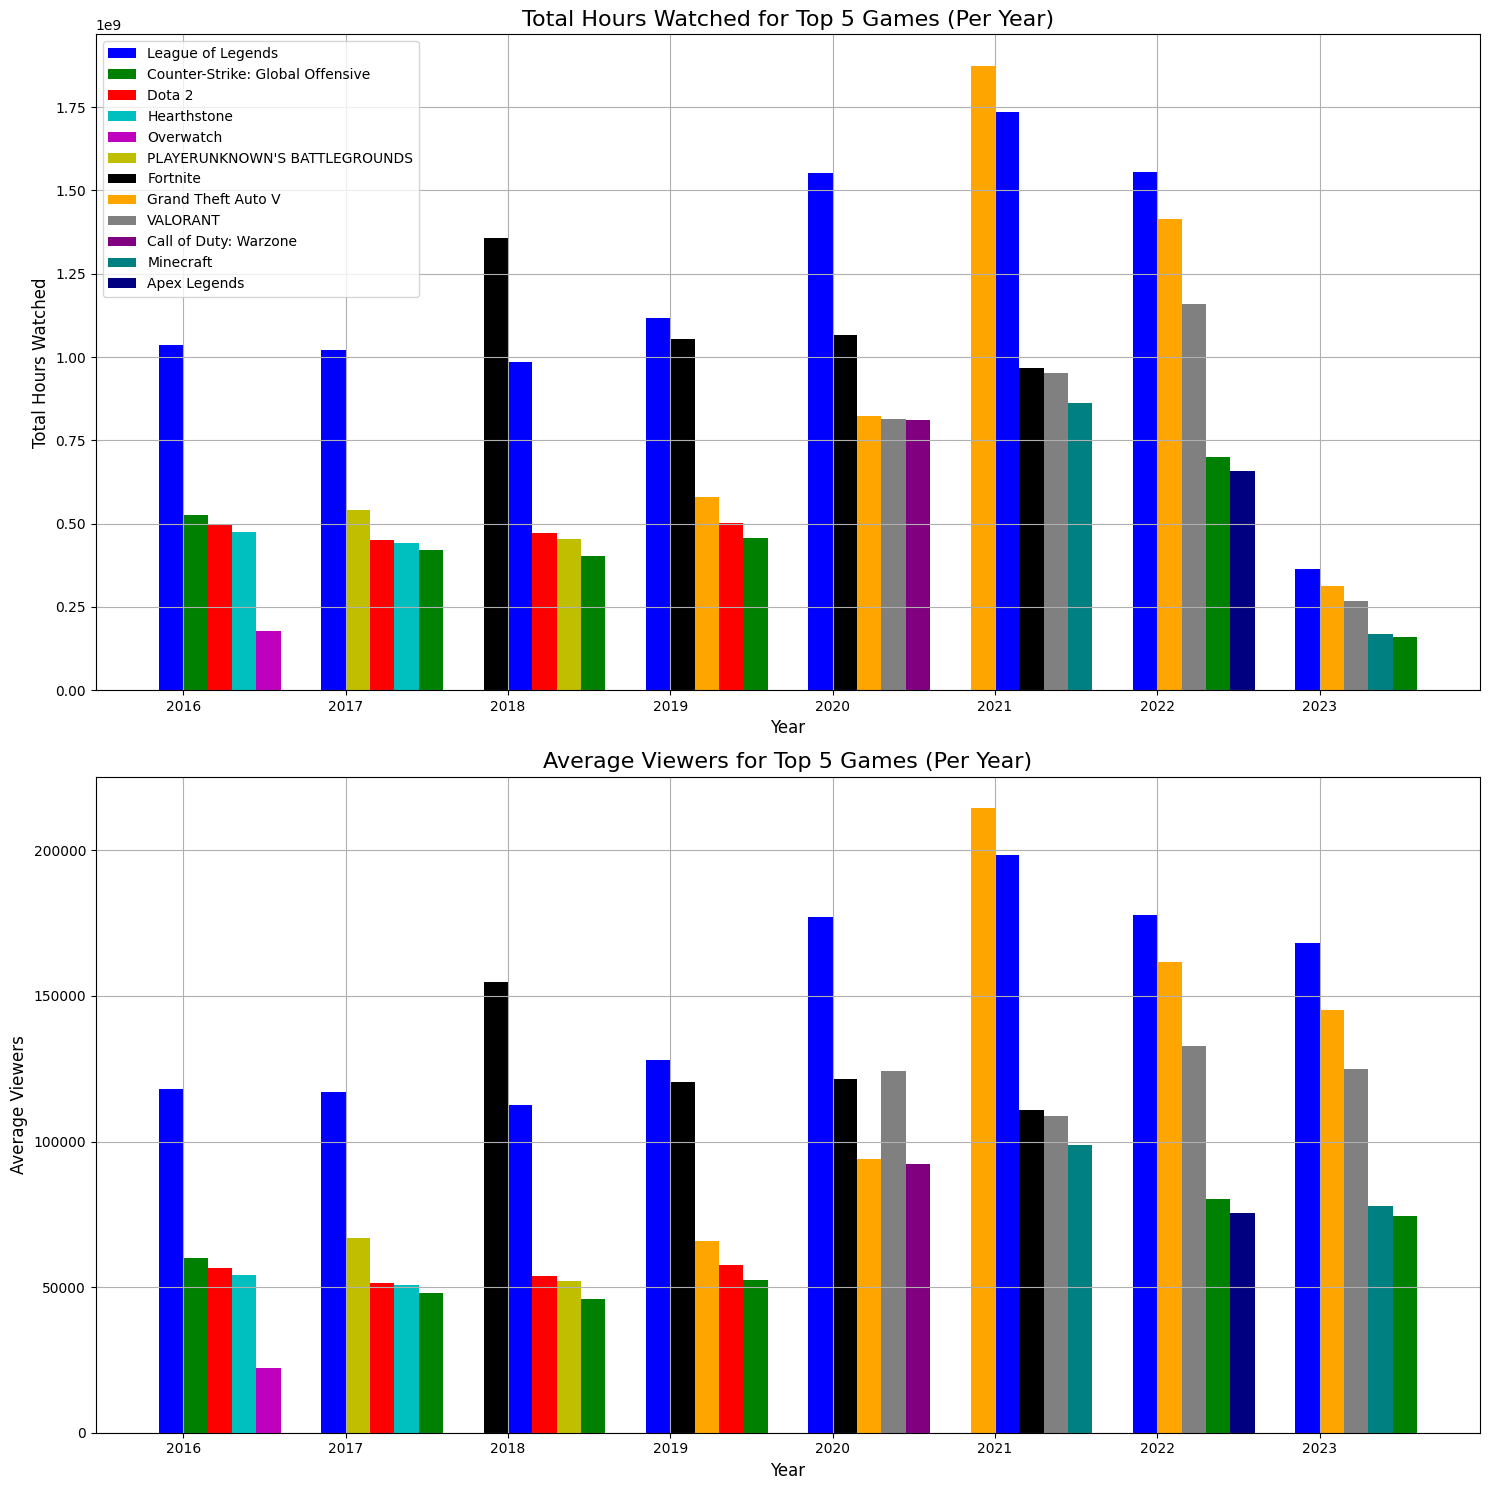

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate average viewers for each game, per year
avg_viewers_game = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Avg_viewers'].mean().reset_index()

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Create width for each bar
bar_width = 0.15

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Create color dictionary for unique game-color pairs
color_dict = {}

# Plotting for each year
for i, year in enumerate(hours_watched['Year'].unique()):
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    
    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        data_hours = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]
        data_avg_viewers = avg_viewers_game[(avg_viewers_game['Game'] == game) & (avg_viewers_game['Year'] == year)]
        
        # Bar plot for total hours watched
        ax[0].bar(bar_positions[i] + j*bar_width, data_hours['Hours_watched'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")
        # Bar plot for average viewers
        ax[1].bar(bar_positions[i] + j*bar_width, data_avg_viewers['Avg_viewers'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

# Formatting
for a in ax:
    a.set_xticks(bar_positions + bar_width / 2)
    a.set_xticklabels(unique_years)
    a.set_xlabel('Year', fontsize=12)
    a.grid(True)

ax[0].set_ylabel('Total Hours Watched', fontsize=12)
ax[0].set_title('Total Hours Watched for Top 5 Games (Per Year)', fontsize=16)

ax[1].set_ylabel('Average Viewers', fontsize=12)
ax[1].set_title('Average Viewers for Top 5 Games (Per Year)', fontsize=16)

# Combine legends
lines, labels = ax[0].get_legend_handles_labels()
ax[0].legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()



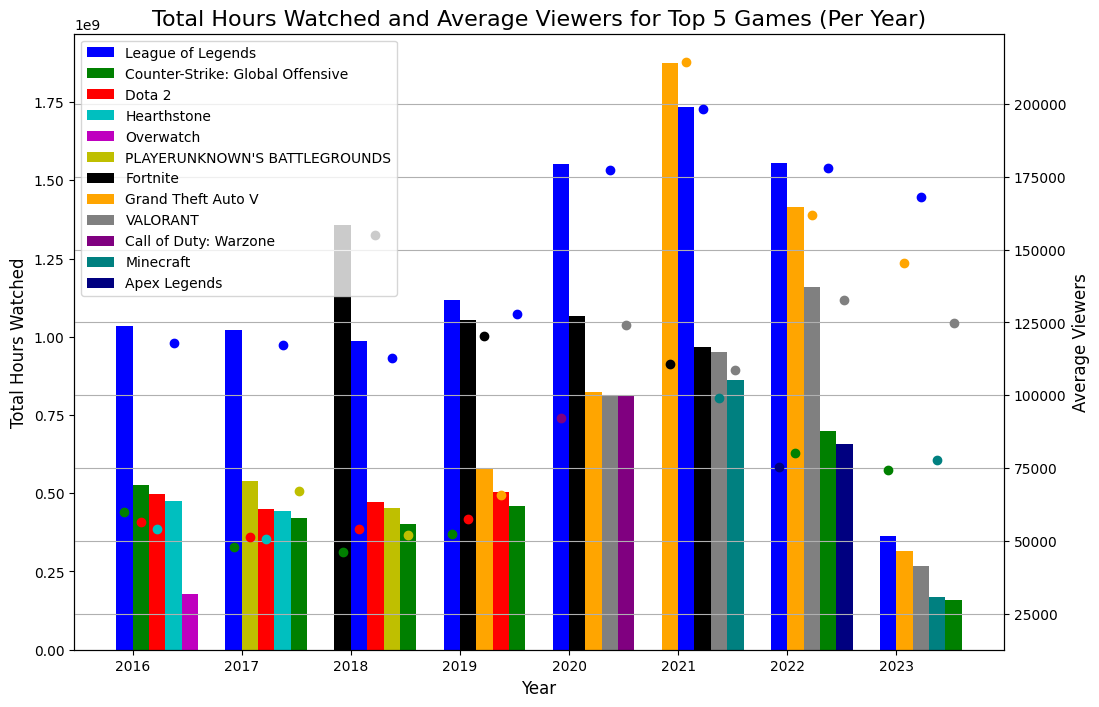

In [455]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate average viewers for each game, per year
avg_viewers_game = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Avg_viewers'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create color dictionary for unique game-color pairs
color_dict = {}

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Create width for each bar
bar_width = 0.15

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Filtering and plotting for each year
for i, year in enumerate(hours_watched['Year'].unique()):
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()

    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]

        # Bar plot for total hours watched
        ax1.bar(bar_positions[i] + j * bar_width, data['Hours_watched'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Line plot for overall average viewers on the secondary y-axis
for i, year in enumerate(unique_years):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    avg_viewers_data = avg_viewers_game[(avg_viewers_game['Year'] == year) & (avg_viewers_game['Game'].isin(top_games))]
    x_values = [bar_positions[i] + j * bar_width for j in range(len(top_games))]
    y_values = avg_viewers_data['Avg_viewers'].tolist()
    colors = [color_dict[game] for game in avg_viewers_data['Game']]
    for x, y, c, game in zip(x_values, y_values, colors, avg_viewers_data['Game']):
        ax2.plot([x], [y], color=c, marker='o', linewidth=2, label=None)

# Formatting
ax1.set_xticks(bar_positions + bar_width / 2)
ax1.set_xticklabels(unique_years)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)
ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()


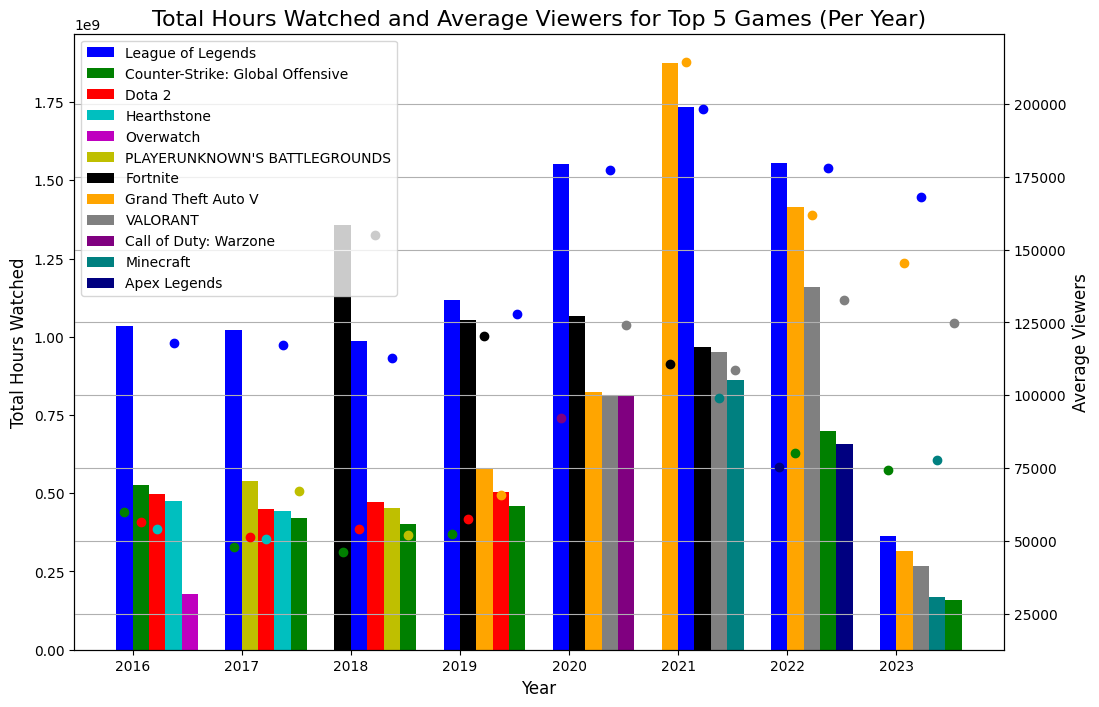

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate average viewers for each game, per year
avg_viewers_game = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Avg_viewers'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create color dictionary for unique game-color pairs
color_dict = {}

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Create width for each bar
bar_width = 0.15

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Filtering and plotting for each year
for i, year in enumerate(hours_watched['Year'].unique()):
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()

    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]

        # Bar plot for total hours watched
        ax1.bar(bar_positions[i] + j * bar_width, data['Hours_watched'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Line plot for overall average viewers on the secondary y-axis
for i, year in enumerate(unique_years):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    avg_viewers_data = avg_viewers_game[(avg_viewers_game['Year'] == year) & (avg_viewers_game['Game'].isin(top_games))]
    x_values = [bar_positions[i] + j * bar_width for j in range(len(top_games))]
    y_values = avg_viewers_data['Avg_viewers'].tolist()
    colors = [color_dict[game] for game in avg_viewers_data['Game']]
    for x, y, c, game in zip(x_values, y_values, colors, avg_viewers_data['Game']):
        ax2.plot(x, y, color=c, marker='o', linewidth=2, label=None)  # assign color explicitly

# Formatting
ax1.set_xticks(bar_positions + bar_width / 2)
ax1.set_xticklabels(unique_years)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)
ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()

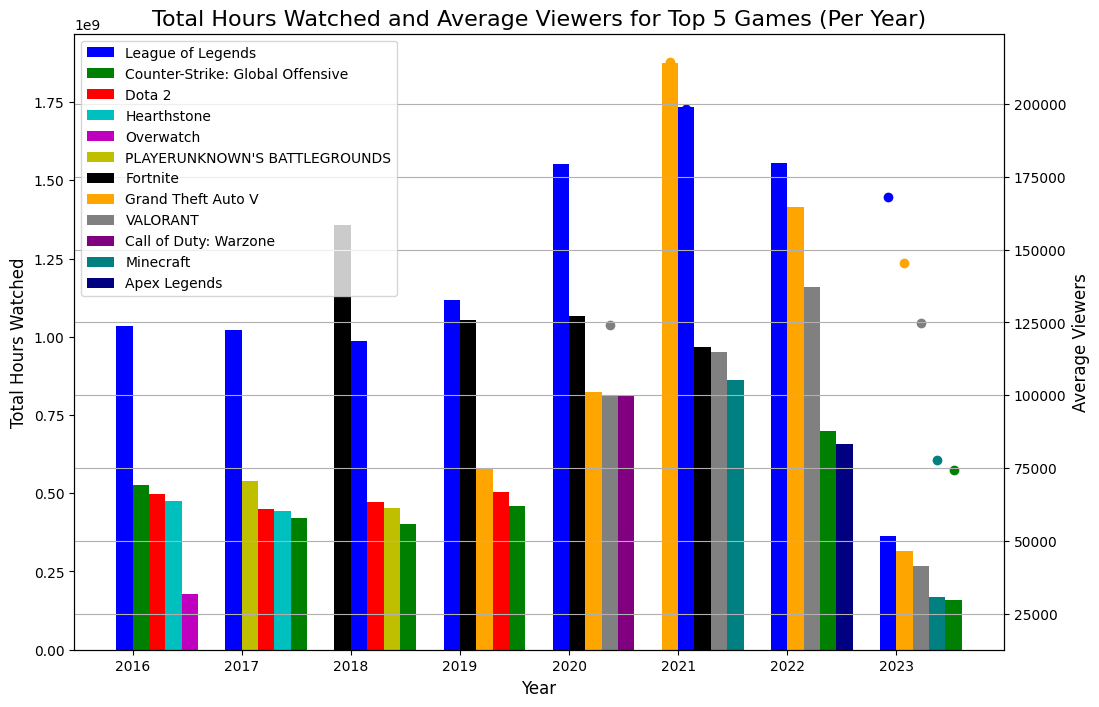

In [457]:
# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate average viewers for each game, per year
avg_viewers_game = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Avg_viewers'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create color dictionary for unique game-color pairs
color_dict = {}

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Create width for each bar
bar_width = 0.15

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Filtering and plotting for each year
for i, year in enumerate(hours_watched['Year'].unique()):
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()

    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]

        # Bar plot for total hours watched
        ax1.bar(bar_positions[i] + j * bar_width, data['Hours_watched'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Line plot for average viewers of each game on the secondary y-axis
for i, year in enumerate(unique_years):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    avg_viewers_data = avg_viewers_game[(avg_viewers_game['Year'] == year) & (avg_viewers_game['Game'].isin(top_games))]

    for j, game in enumerate(top_games):
        game_avg_viewers = avg_viewers_data[avg_viewers_data['Game'] == game]['Avg_viewers']
        ax2.scatter(bar_positions[i] + j * bar_width, game_avg_viewers, color=color_dict[game], marker='o')

# Formatting
ax1.set_xticks(bar_positions + bar_width / 2)
ax1.set_xticklabels(unique_years)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)
ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()

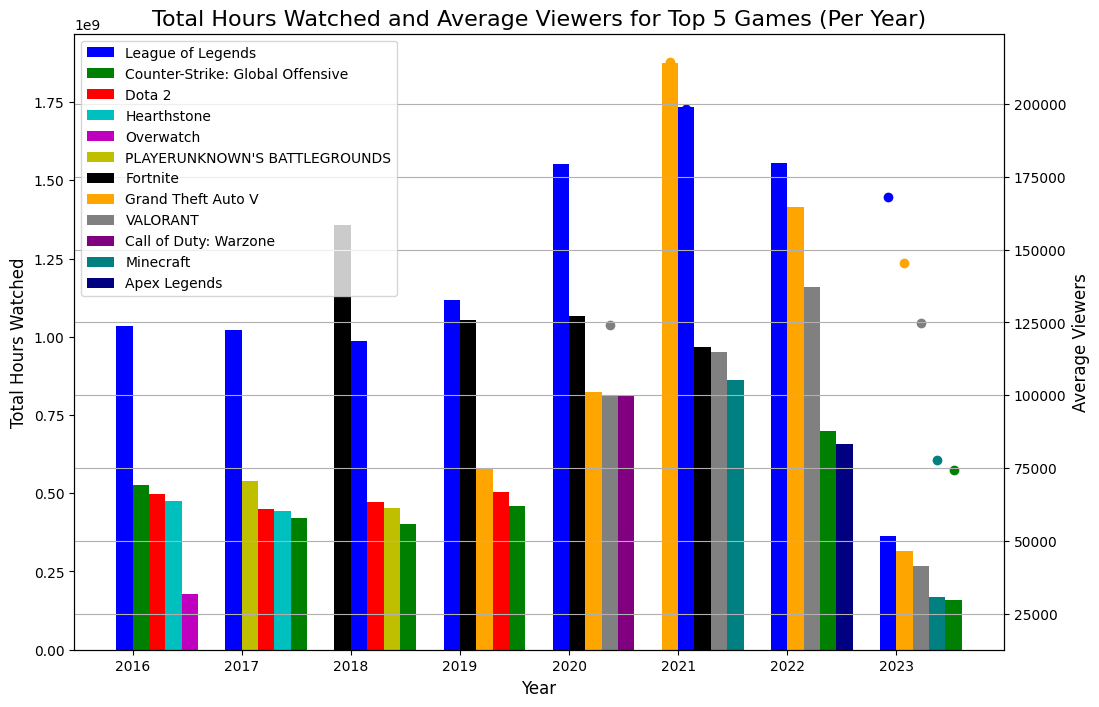

In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate average viewers for each game, per year
avg_viewers_game = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Avg_viewers'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create color dictionary for unique game-color pairs
color_dict = {}

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Create width for each bar
bar_width = 0.15

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Filtering and plotting for each year
for i, year in enumerate(hours_watched['Year'].unique()):
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    
    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]

        # Bar plot for total hours watched
        ax1.bar(bar_positions[i] + j * bar_width, data['Hours_watched'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Scatter plot for average viewers of each game on the secondary y-axis
for i, year in enumerate(unique_years):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    avg_viewers_data = avg_viewers_game[(avg_viewers_game['Year'] == year) & (avg_viewers_game['Game'].isin(top_games))]

    for index, row in avg_viewers_data.iterrows():
        j = top_games.index(row['Game'])
        ax2.scatter(bar_positions[i] + j * bar_width, row['Avg_viewers'], color=color_dict[row['Game']], marker='o')

# Formatting
ax1.set_xticks(bar_positions + bar_width / 2)
ax1.set_xticklabels(unique_years)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)
ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()

rearragned the scatter plot so each dot is above the corresponding bar for the game, but now I think the bars are covering the scatter plot. Let's try and find out if that's the case.

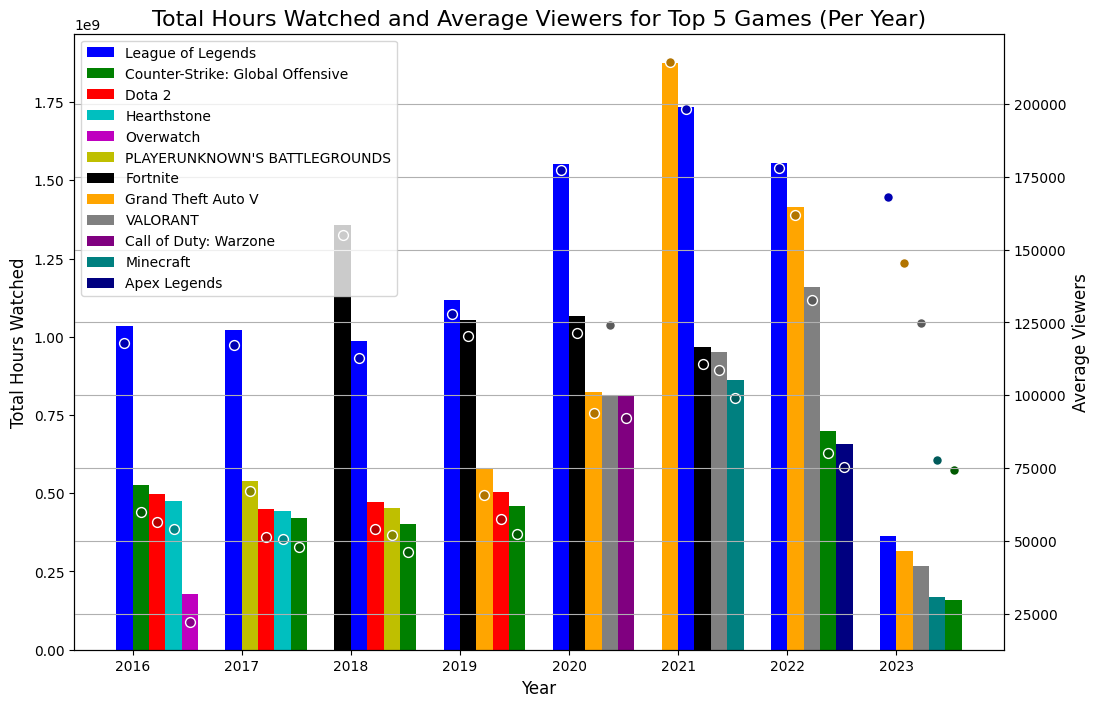

In [459]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgb, to_hex

def darken_color(color, factor=0.7):
    """Returns a darkened version of the given color."""
    rgb = to_rgb(color)
    return to_hex([x * factor for x in rgb])

# Calculate total hours watched for each game, per year
hours_watched = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_watched'].sum().reset_index()

# Calculate average viewers for each game, per year
avg_viewers_game = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Avg_viewers'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create color dictionary for unique game-color pairs
color_dict = {}
dark_color_dict = {}  # dictionary for darker colors

# List of colors (consider a longer list or using a colormap if there are more games)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Create width for each bar
bar_width = 0.15

# Get list of unique years
unique_years = hours_watched['Year'].unique()

# Generate list of positions for each bar
bar_positions = np.arange(len(unique_years))

# Filtering and plotting for each year
for i, year in enumerate(hours_watched['Year'].unique()):
    # Find top 5 games of this year based on total hours watched
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    
    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
            dark_color_dict[game] = darken_color(color_dict[game])  # generate and store darker color
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]

        # Bar plot for total hours watched
        ax1.bar(bar_positions[i] + j * bar_width, data['Hours_watched'], color=color_dict[game], width=bar_width, align='center', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

# Create second axis for the average viewers
ax2 = ax1.twinx()

# Scatter plot for average viewers of each game on the secondary y-axis
for i, year in enumerate(unique_years):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    avg_viewers_data = avg_viewers_game[(avg_viewers_game['Year'] == year) & (avg_viewers_game['Game'].isin(top_games))]

    for index, row in avg_viewers_data.iterrows():
        j = top_games.index(row['Game'])
        ax2.scatter(bar_positions[i] + j * bar_width, row['Avg_viewers'], color=dark_color_dict[row['Game']], marker='o', edgecolors='white', s=50)  # added edgecolor and size parameters

# Formatting
ax1.set_xticks(bar_positions + bar_width / 2)
ax1.set_xticklabels(unique_years)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Hours Watched', fontsize=12)
ax2.set_ylabel('Average Viewers', fontsize=12)
ax1.set_title('Total Hours Watched and Average Viewers for Top 5 Games (Per Year)', fontsize=16)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()

In [460]:
# Prepare an empty list to hold the data dictionaries
data_list = []

# Get the data for the table
for year in hours_watched['Year'].unique():
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()
    for game in top_games:
        total_hours = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]['Hours_watched'].values[0]
        avg_viewers = avg_viewers_game[(avg_viewers_game['Game'] == game) & (avg_viewers_game['Year'] == year)]['Avg_viewers'].values[0]
        data_dict = {'Year': year, 'Game': game, 'Total Hours Watched': total_hours, 'Average Viewers': avg_viewers}
        data_list.append(data_dict)

# Convert the list of dictionaries to a DataFrame
table_df = pd.DataFrame(data_list)

# Sort the DataFrame for a cleaner look
table_df.sort_values(['Year', 'Total Hours Watched'], ascending=[True, False], inplace=True)

# Reset the index for a cleaner look
table_df.reset_index(drop=True, inplace=True)

# Display the table
print(table_df)

    Year                              Game  Total Hours Watched   
0   2016                 League of Legends           1035469850  \
1   2016  Counter-Strike: Global Offensive            526391918   
2   2016                            Dota 2            496585969   
3   2016                       Hearthstone            474016816   
4   2016                         Overwatch            178952454   
5   2017                 League of Legends           1022398595   
6   2017     PLAYERUNKNOWN'S BATTLEGROUNDS            539829453   
7   2017                            Dota 2            449879503   
8   2017                       Hearthstone            442752554   
9   2017  Counter-Strike: Global Offensive            419802259   
10  2018                          Fortnite           1358048914   
11  2018                 League of Legends            985380685   
12  2018                            Dota 2            472414819   
13  2018     PLAYERUNKNOWN'S BATTLEGROUNDS            45415707

INSIGHTS FROM ABOVE:

Dominance of "League of Legends": "League of Legends" has consistently been the game with the most hours watched each year from 2016 to 2023, except for 2018, where it was surpassed by "Fortnite". Even in 2018, it remained in the top 5 games with the highest hours watched.

Rise and fall of "Fortnite": "Fortnite" had a massive rise in popularity in 2018, with the most hours watched that year. However, it didn't manage to maintain that lead in the following years. By 2022, it dropped out of the top 5 games with the most hours watched.

Stability of "Counter-Strike: Global Offensive" and "Dota 2": Both "Counter-Strike: Global Offensive" and "Dota 2" have regularly appeared in the top 5 list from 2016 to 2019 for hours watched. However, their average viewers have been relatively lower compared to games like "League of Legends" or "Fortnite", which suggests that they have a stable but smaller viewer base.

Increase in hours watched for "Grand Theft Auto V": The total hours watched for "Grand Theft Auto V" have seen a substantial increase from 2019 to 2021, even surpassing "League of Legends" in 2021.

High Average Viewers for "League of Legends" and "Grand Theft Auto V": Both "League of Legends" and "Grand Theft Auto V" have consistently high average viewers each year they appear in the top 5, suggesting a large and consistent viewer base.

Emergence of new games: New games like "VALORANT" and "Call of Duty: Warzone" emerged in the top 5 list starting from 2020 and 2022 respectively, showing the dynamic nature of gaming trends.

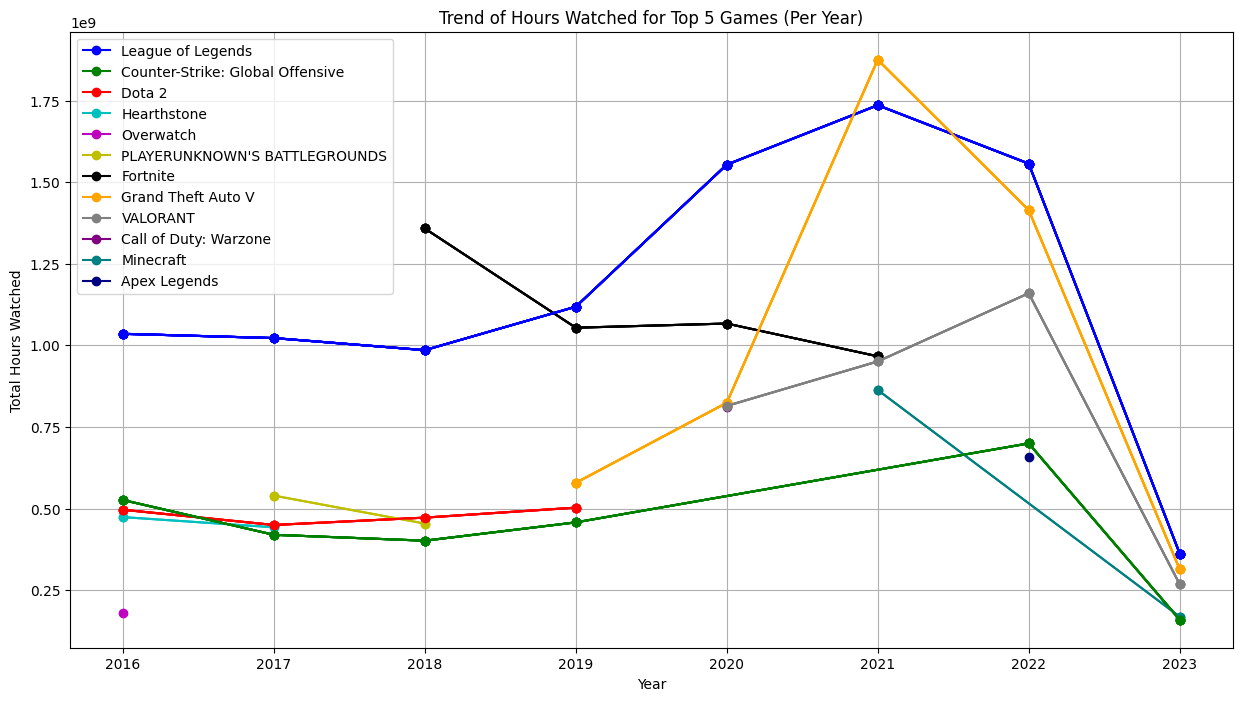

In [461]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Create color dictionary for consistent colors for each game
color_dict = {}

# Create a list of colors to pick from
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Plot hours watched for each game by year
for year in table_df['Year'].unique():
    # Get top 5 games for the year
    top_games = table_df[table_df['Year'] == year].nlargest(5, 'Total Hours Watched')['Game'].tolist()

    for game in top_games:
        # Assign color to game if not already assigned
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
        
        # Extract data for the game
        data = table_df[(table_df['Game'] == game)]
        
        # Plot data
        plt.plot(data['Year'], data['Total Hours Watched'], color=color_dict[game], marker='o', label=game if game not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xlabel('Year')
plt.ylabel('Total Hours Watched')
plt.title('Trend of Hours Watched for Top 5 Games (Per Year)')
plt.legend()
plt.grid(True)
plt.show()

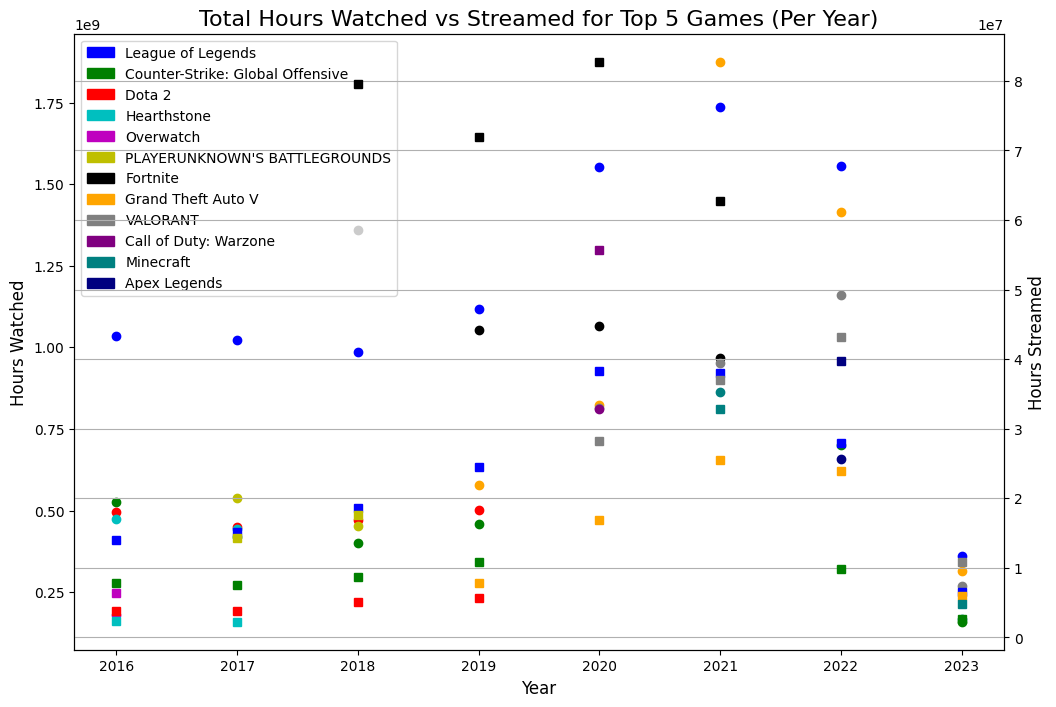

In [462]:
import matplotlib.patches as mpatches

# Calculate total hours streamed for each game, per year
hours_streamed = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_streamed'].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a second y-axis
ax2 = ax1.twinx()

color_dict = {}

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Define legend elements
legend_elements = []

# Line plots for hours watched
for i, year in enumerate(hours_watched['Year'].unique()):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()

    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
            legend_elements.append(mpatches.Patch(color=color_dict[game], label=game))
        
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]
        ax1.plot(year, data['Hours_watched'], color=color_dict[game], marker='o')

# Line plots for hours streamed on the secondary axis
for i, year in enumerate(hours_streamed['Year'].unique()):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()

    for j, game in enumerate(top_games):
        data = hours_streamed[(hours_streamed['Game'] == game) & (hours_streamed['Year'] == year)]
        ax2.plot(year, data['Hours_streamed'], color=color_dict[game], marker='s', linestyle='dashed')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Hours Watched', fontsize=12)
ax2.set_ylabel('Hours Streamed', fontsize=12)  # set label for the secondary y-axis
ax1.set_title('Total Hours Watched vs Streamed for Top 5 Games (Per Year)', fontsize=16)
ax1.legend(handles=legend_elements, loc='upper left')

plt.grid(True)
plt.show()

lets specify what the circles refer to and what the square refers to

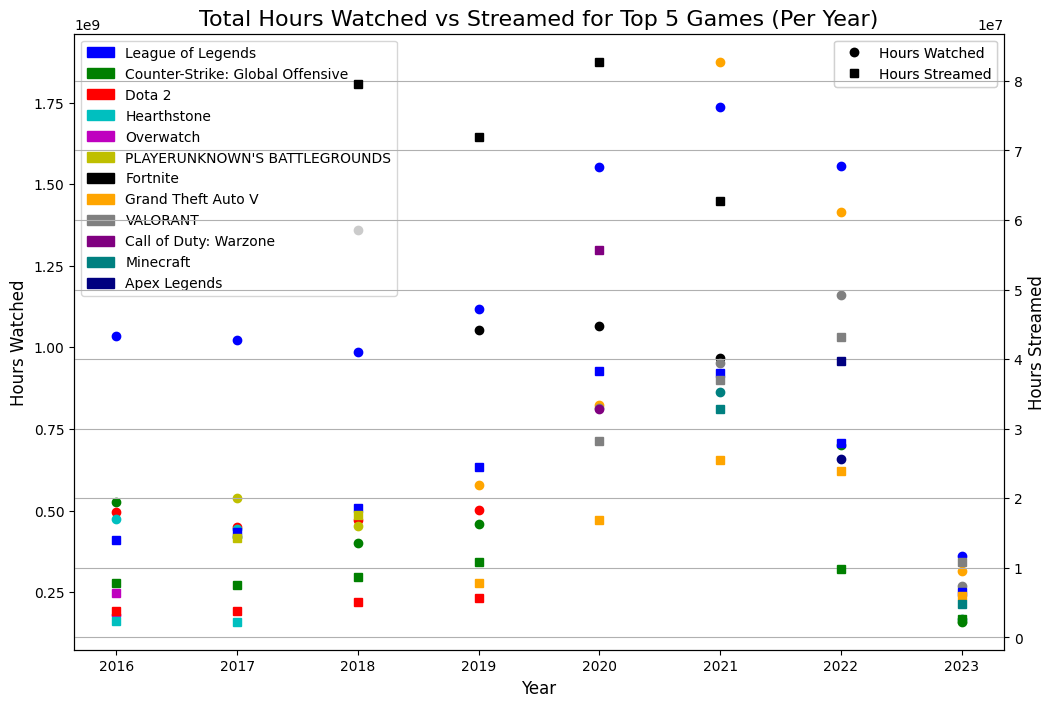

In [463]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Calculate total hours streamed for each game, per year
hours_streamed = twitch_df[twitch_df['Game'] != 'Just Chatting'].groupby(['Year', 'Game'])['Hours_streamed'].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a second y-axis
ax2 = ax1.twinx()

color_dict = {}

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#808080', '#800080', '#008080', '#000080', '#800000', '#808000', '#00FFFF', '#FF00FF']

# Define a list to hold the patches for the legend
legend_elements = []

# Line plots for hours watched
for i, year in enumerate(hours_watched['Year'].unique()):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()

    for j, game in enumerate(top_games):
        if game not in color_dict:
            color_dict[game] = colors[len(color_dict) % len(colors)]
            legend_elements.append(mpatches.Patch(color=color_dict[game], label=game))
        
        data = hours_watched[(hours_watched['Game'] == game) & (hours_watched['Year'] == year)]
        ax1.plot(year, data['Hours_watched'], color=color_dict[game], marker='o')

# Line plots for hours streamed on the secondary axis
for i, year in enumerate(hours_streamed['Year'].unique()):
    top_games = hours_watched[hours_watched['Year'] == year].nlargest(5, 'Hours_watched')['Game'].tolist()

    for j, game in enumerate(top_games):
        data = hours_streamed[(hours_streamed['Game'] == game) & (hours_streamed['Year'] == year)]
        ax2.plot(year, data['Hours_streamed'], color=color_dict[game], marker='s', linestyle='dashed')

# Define marker legend elements
legend_elements_markers = [mlines.Line2D([], [], color='k', marker='o', linestyle='None', label='Hours Watched'),
                           mlines.Line2D([], [], color='k', marker='s', linestyle='None', label='Hours Streamed')]

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Hours Watched', fontsize=12)
ax2.set_ylabel('Hours Streamed', fontsize=12)  # set label for the secondary y-axis
ax1.set_title('Total Hours Watched vs Streamed for Top 5 Games (Per Year)', fontsize=16)

# Create two legends
legend1 = ax1.legend(handles=legend_elements, loc='upper left')
legend2 = ax1.legend(handles=legend_elements_markers, loc='upper right')

# Add the legends to the plot
ax1.add_artist(legend1)
ax1.add_artist(legend2)

plt.grid(True)
plt.show()


"League of Legends" has consistently been the most watched game every year. In 2021, it had the second highest number of hours watched at approximately 1.74 billion hours.

"Grand Theft Auto V" had a remarkable increase in watch time from 2020 to 2021, with hours watched almost doubling from approximately 824 million to around 1.87 billion.

The game "Fortnite" peaked in 2018 with approximately 1.36 billion hours watched but saw a slight decrease in the following years.

The game "Dota 2" appears in the top five list from 2016 to 2019, but it doesn't make the list in subsequent years, suggesting a decrease in its popularity.

In 2022 and 2023, the newcomer "VALORANT" appears in the top five list, indicating its growing popularity.

For hours streamed, the game "Fortnite" had an exceptional peak in 2018 with almost 80 million hours. This dropped in the following years but remained high compared to many other games.

"League of Legends" consistently had high hours streamed every year. In 2020, it reached a peak at approximately 38 million hours.

In 2021, "Grand Theft Auto V" and "Fortnite" had the most hours streamed after "League of Legends", with approximately 25 and 63 million hours, respectively.

Summary of trend analysis: How have the hours watched and streamed for the top 5 games changed over the years?

Established Titles and Their Resilience:
League of Legends' Dominance: Across nearly all the years studied, League of Legends has held its ground as the most-watched game, highlighting its consistent popularity and committed audience. Apart from a brief stint in 2018 when Fortnite took the lead, League of Legends consistently dominated in terms of hours watched.

Stability of Counter-Strike: Global Offensive and Dota 2: These titles consistently made it to the top 5 list from 2016 to 2019. Although they did not generate as many viewer hours as giants like League of Legends or Fortnite, their consistent presence in the top 5 suggests a dedicated, if slightly smaller, viewer base.

Rise, Fall, and Emergence of Games:
Fortnite's Meteoric Rise and Gradual Decline: Fortnite made a remarkable entry in 2018, securing the top spot in terms of hours watched. However, its reign was short-lived as it started declining from 2019 onward, eventually falling out of the top 5 by 2022.

Grand Theft Auto V's Rapid Ascend: Grand Theft Auto V's viewership experienced a substantial rise from 2019 to 2021, even surpassing League of Legends in 2021. This demonstrates a significant shift in player and viewer preferences.

Emergence of New Contenders: The dynamic nature of gaming trends is demonstrated by the rise of newer games like Valorant and Call of Duty: Warzone. These titles broke into the top 5 list in 2020 and 2022, respectively, suggesting a robust demand for new content among viewers.

Streamers' Choice:
Preference for Fortnite and League of Legends: In terms of hours streamed, Fortnite and League of Legends have consistently been the preferred choice for streamers. Fortnite, in particular, reached an unprecedented peak in 2018 with nearly 80 million hours streamed.

Grand Theft Auto V's Popularity among Streamers: In 2021, Grand Theft Auto V saw substantial streaming hours, second only to League of Legends. This indicates its growing appeal not just among viewers but streamers as well.

Decreasing Popularity:
Dota 2's Decline: While Dota 2 was among the top five most-watched games from 2016 to 2019, it didn't make the list in subsequent years, indicating a potential decrease in its popularity.
These trends underscore the highly dynamic nature of game popularity, heavily influenced by factors like game updates, community engagement, marketing efforts, and the influx of new titles.

Please note: The data for 2023 is not complete and therefore should not be considered final.


Comparative Analysis: How do the top games on Twitch compare in terms of hours watched, hours streamed, peak viewers, peak channels, and average viewers?

In [464]:
# create a cursor object
cursor = conn.cursor()

# define the SQL query
query = '''
SELECT Game,
       AVG(Hours_watched) AS avg_hours_watched,
       AVG(Hours_streamed) AS avg_hours_streamed,
       AVG(Peak_viewers/Peak_channels) AS avg_peak_ratio
FROM twitch
GROUP BY Game;
'''

# execute the SQL query
cursor.execute(query)

# fetch all the results
results = cursor.fetchall()

# print the results
for row in results:
    print(row)


(None, 317951.0, 77004.0, 5.0)
('.hack//G.U. Last Recode', 145350.0, 35258.0, 4.0)
('20 Minutes Till Dawn', 911356.0, 12253.0, 371.0)
('60 Parsecs!', 529688.0, 1867.0, 1183.0)
('60 Seconds!', 314900.55555555556, 1023.1111111111111, 2253.8888888888887)
('7 Days to Die', 953382.0229885058, 85423.05747126437, 55.839080459770116)
('<U+014C>kami', 181539.0, 19273.0, 198.0)
('A Dance of Fire and Ice', 452164.0, 7002.0, 381.5)
('A Hat in Time', 331964.3333333333, 13813.666666666666, 314.6666666666667)
('A Plague Tale: Innocence', 1700679.0, 36870.0, 189.0)
('A Plague Tale: Requiem', 2512917.5, 96420.5, 54.5)
('A Total War Saga: Troy', 1019391.0, 23357.0, 130.0)
('A Way Out', 2350131.3333333335, 54092.333333333336, 270.6666666666667)
('ABZ<U+00DB>', 338342.0, 5738.0, 243.0)
('AI: The Somnium Files', 478332.5, 5140.0, 447.5)
('ALTF4', 2137753.5, 12024.75, 1067.25)
('ANIME STANDING', 807420.0, 8907.0, 110.0)
('ANIME WORLD', 1102247.5, 33214.5, 44.0)
('APB Reloaded', 277614.0, 10747.0, 469.0)
('A

Great data is set! Lets Run some simple SQL functions to get a better look at the data.

MIN and MAX: highlight games with particularly high or low viewer engagement.

In [465]:
cursor = conn.cursor()
query = """
SELECT Game,
       MIN(Hours_watched) AS min_hours_watched,
       MAX(Hours_watched) AS max_hours_watched,
       MIN(Hours_streamed) AS min_hours_streamed,
       MAX(Hours_streamed) AS max_hours_streamed
FROM twitch
GROUP BY Game;
"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)

(None, 317951, 317951, 77004, 77004)
('.hack//G.U. Last Recode', 145350, 145350, 35258, 35258)
('20 Minutes Till Dawn', 911356, 911356, 12253, 12253)
('60 Parsecs!', 529688, 529688, 1867, 1867)
('60 Seconds!', 109473, 772786, 503, 2065)
('7 Days to Die', 99191, 2916116, 8504, 200059)
('<U+014C>kami', 181539, 181539, 19273, 19273)
('A Dance of Fire and Ice', 395310, 509018, 5428, 8576)
('A Hat in Time', 221082, 488213, 6774, 20147)
('A Plague Tale: Innocence', 768577, 2632781, 19387, 54353)
('A Plague Tale: Requiem', 781641, 4244194, 60087, 132754)
('A Total War Saga: Troy', 1019391, 1019391, 23357, 23357)
('A Way Out', 544924, 5423162, 23367, 89705)
('ABZ<U+00DB>', 338342, 338342, 5738, 5738)
('AI: The Somnium Files', 424053, 532612, 5032, 5248)
('ALTF4', 1703934, 2411305, 7400, 16068)
('ANIME STANDING', 807420, 807420, 8907, 8907)
('ANIME WORLD', 1099992, 1104503, 31692, 34737)
('APB Reloaded', 277614, 277614, 10747, 10747)
('ARAYA', 142823, 142823, 437, 437)
('ARK: Survival Evolved',

In [466]:
cursor = conn.cursor()

# First, get the top 10 games by hours watched
query_top_games = """
SELECT Game
FROM (
  SELECT Game, SUM(Hours_watched) AS total_hours_watched
  FROM twitch
  GROUP BY Game
  ORDER BY total_hours_watched DESC
  LIMIT 10
) AS sub_top_games
"""

cursor.execute(query_top_games)
top_games = [row[0] for row in cursor.fetchall()]

# Then, for each of these games, get the max and min hours watched and hours streamed
for game in top_games:
    print(f"Game: {game}")
    
    query_game_watched = """
    SELECT MIN(Hours_watched) AS min_hours_watched,
           MAX(Hours_watched) AS max_hours_watched
    FROM twitch
    WHERE Game = ?
    """
    cursor.execute(query_game_watched, (game,))
    min_max_watched = cursor.fetchone()
    print(f"Min Hours Watched: {min_max_watched[0]}, Max Hours Watched: {min_max_watched[1]}")
    
    query_game_streamed = """
    SELECT MIN(Hours_streamed) AS min_hours_streamed,
           MAX(Hours_streamed) AS max_hours_streamed
    FROM twitch
    WHERE Game = ?
    """
    cursor.execute(query_game_streamed, (game,))
    min_max_streamed = cursor.fetchone()
    print(f"Min Hours Streamed: {min_max_streamed[0]}, Max Hours Streamed: {min_max_streamed[1]}")
    print()

Game: Just Chatting
Min Hours Watched: 3791420, Max Hours Watched: 289547911
Min Hours Streamed: 37737, Max Hours Streamed: 3544601

Game: League of Legends
Min Hours Watched: 68210459, Max Hours Watched: 208574800
Min Hours Streamed: 1004238, Max Hours Streamed: 4354400

Game: Grand Theft Auto V
Min Hours Watched: 1489213, Max Hours Watched: 253419456
Min Hours Streamed: 221364, Max Hours Streamed: 2510018

Game: Fortnite
Min Hours Watched: 1376994, Max Hours Watched: 152086231
Min Hours Streamed: 144303, Max Hours Streamed: 10245704

Game: Counter-Strike: Global Offensive
Min Hours Watched: 18625865, Max Hours Watched: 93930915
Min Hours Streamed: 548932, Max Hours Streamed: 1981314

Game: Dota 2
Min Hours Watched: 24378147, Max Hours Watched: 98815597
Min Hours Streamed: 272972, Max Hours Streamed: 756545

Game: VALORANT
Min Hours Watched: 37362055, Max Hours Watched: 344551979
Min Hours Streamed: 1947328, Max Hours Streamed: 4763465

Game: Minecraft
Min Hours Watched: 3074493, Max 

some infereances based on the data above

Just Chatting: The "Just Chatting" category isn't a game but still attracts a massive viewership on Twitch. It's interesting to see how this non-game category competes with major titles in terms of viewership, indicating that Twitch's audience appreciates a broad range of content, not just gaming.

Fortnite: Despite being one of the most popular games globally, Fortnite has one of the lowest minimum hours watched among the top games. This suggests that Fortnite's viewership can be highly variable, possibly reflecting the game's event-driven nature, where certain periods (like new seasons or special events) attract significantly higher viewership.

League of Legends and Dota 2: It's interesting to see that despite being similar genres (MOBAs), League of Legends consistently garners a higher viewership than Dota 2, indicating a stronger or more engaged viewership base.

Counter-Strike: Global Offensive (CS:GO): Compared to other games, CS:GO has a smaller difference between its minimum and maximum hours watched. This could imply a more stable and consistent viewer base.

Valorant: Despite being a relatively new game (launched in 2020), VALORANT has a vast viewership range, indicating its rapid growth and popularity in the streaming community.

*Just Chattng has been excluded from most analysis so far, but I thought it would be interesting just to take a look at some of it's data

In [467]:
cursor = conn.cursor()
query = """
SELECT Game,
       SUM(Hours_watched) AS total_hours_watched,
       SUM(Hours_streamed) AS total_hours_streamed
FROM twitch
GROUP BY Game
ORDER BY total_hours_watched DESC
LIMIT 20;
"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)

('Just Chatting', 9859122825, 124256555)
('League of Legends', 9370061528, 183033950)
('Grand Theft Auto V', 5311617139, 91894647)
('Fortnite', 5270720577, 356677881)
('Counter-Strike: Global Offensive', 4146563160, 78468620)
('Dota 2', 3660163488, 43133713)
('VALORANT', 3193493119, 119126023)
('Minecraft', 2477419349, 97058563)
('Hearthstone', 2300474896, 14681285)
('Call of Duty: Warzone', 2273785423, 122228067)
('World of Warcraft', 2273732890, 74111933)
('Apex Legends', 2135418052, 138486739)
("PLAYERUNKNOWN'S BATTLEGROUNDS", 1475296705, 53666554)
('Overwatch', 1393597856, 59969971)
('Dead by Daylight', 1089071042, 57763634)
('Slots', 966931397, 4314217)
('Music', 910809437, 35587970)
('Rust', 840726478, 15266859)
('Teamfight Tactics', 834018669, 13219587)
("Tom Clancy's Rainbow Six Siege", 818383437, 56528201)


Let's exclude Just Chatting this time

In [468]:
cursor = conn.cursor()
query = """
SELECT Game,
       SUM(Hours_watched) AS total_hours_watched,
       SUM(Hours_streamed) AS total_hours_streamed
FROM twitch
WHERE Game != 'Just Chatting'
GROUP BY Game
ORDER BY total_hours_watched DESC
LIMIT 20;
"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)


('League of Legends', 9370061528, 183033950)
('Grand Theft Auto V', 5311617139, 91894647)
('Fortnite', 5270720577, 356677881)
('Counter-Strike: Global Offensive', 4146563160, 78468620)
('Dota 2', 3660163488, 43133713)
('VALORANT', 3193493119, 119126023)
('Minecraft', 2477419349, 97058563)
('Hearthstone', 2300474896, 14681285)
('Call of Duty: Warzone', 2273785423, 122228067)
('World of Warcraft', 2273732890, 74111933)
('Apex Legends', 2135418052, 138486739)
("PLAYERUNKNOWN'S BATTLEGROUNDS", 1475296705, 53666554)
('Overwatch', 1393597856, 59969971)
('Dead by Daylight', 1089071042, 57763634)
('Slots', 966931397, 4314217)
('Music', 910809437, 35587970)
('Rust', 840726478, 15266859)
('Teamfight Tactics', 834018669, 13219587)
("Tom Clancy's Rainbow Six Siege", 818383437, 56528201)
('Escape from Tarkov', 720593876, 18441522)


Let's look a bit at peak viewers and peak channels

In [469]:
cursor = conn.cursor()
query = """
SELECT Game, 
       MAX(Peak_viewers) AS max_peak_viewers
FROM twitch
GROUP BY Game
ORDER BY max_peak_viewers DESC
LIMIT 20;
"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)

('Special Events', 3366021)
('League of Legends', 3145012)
('Just Chatting', 2787896)
('Fortnite', 2331987)
('Minecraft', 2189881)
('Counter-Strike: Global Offensive', 1916027)
('Arcane', 1832845)
('E3 2018', 1817345)
('VALORANT', 1728977)
('Dota 2', 1636441)
('Call of Duty: Warzone', 1629284)
('Sports', 1540052)
('Overwatch', 1459249)
('Rust', 1373791)
('Lost Ark', 1273854)
('Hogwarts Legacy', 1249796)
('Grand Theft Auto V', 1140656)
('Cyberpunk 2077', 1126038)
('E3 2017', 1105343)
('World of Warcraft', 1103295)


In [470]:
cursor = conn.cursor()
query = """
SELECT Game, 
       MAX(Peak_channels) AS max_peak_channels
FROM twitch
GROUP BY Game
ORDER BY max_peak_channels DESC
LIMIT 20;
"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)

('Fortnite', 129860)
('Cyberpunk 2077', 35125)
('Call Of Duty: Modern Warfare', 34107)
('Call of Duty: Warzone', 31506)
('Hogwarts Legacy', 29306)
('World of Warcraft', 25791)
('Call of Duty: Black Ops Cold War', 23867)
('Elden Ring', 22969)
('Call of Duty: Modern Warfare II', 22803)
('Destiny 2', 20975)
('Apex Legends', 18932)
('New World', 16321)
('VALORANT', 16287)
('Resident Evil Village', 15093)
('Call of Duty: Vanguard', 15077)
('Call of Duty: Black Ops 4', 13323)
('Just Chatting', 13308)
('Resident Evil 4', 12902)
('Lost Ark', 12784)
('Overwatch 2', 12678)


Now lets create the average peak ratio. The average peak ratio essentially gives an average number of viewers per channel at the peak of viewership. It only provides a measure of efficiency in attracting viewers per channel at peak times!!

In [471]:
cursor = conn.cursor()
query = """
SELECT Game, 
       AVG(Peak_viewers/Peak_channels) AS avg_peak_ratio
FROM twitch
GROUP BY Game
ORDER BY avg_peak_ratio DESC
LIMIT 20;
"""
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(row)

('RISK: The Game of Global Domination', 46248.0)
('Super Punch-Out!!', 36788.0)
('RNC 2016', 29021.0)
('Pepsiman', 27380.0)
('VVVVVV', 22830.0)
('Devil May Cry', 21375.0)
('Hexen: Beyond Heretic', 20925.0)
('Metro Sim Hustle', 19419.0)
('QuackShot starring Donald Duck', 18149.0)
('Tetris with Cardcaptor Sakura: Eternal Heart', 18137.0)
('Fallout', 18104.0)
("Donkey Kong Country 3: Dixie Kong's Double Trouble!", 18063.0)
('Guacamelee! Gold Edition', 17960.0)
('F-Zero GX', 17889.0)
('Rocket: Robot on Wheels', 17827.0)
('Azure Striker GUNVOLT 2', 17809.0)
('Mega Man Network Transmission', 17012.0)
('New Super Mario Bros.', 16847.0)
('Tetris: The Grand Master', 16512.0)
('Silent Hill 4: The Room', 16345.0)


RISK: The Game of Global Domination' appears to have a very high average peak viewership per channel, suggesting that channels streaming this game may have a higher than average potential reach during peak times.

The games on this list are not necessarily the most streamed or most watched games. Instead, they represent games that have the highest ratio of viewers to channels at their peak times. This might suggest that these games have a dedicated viewer base that is highly concentrated around fewer channels.

Peak Channels vs. Hours Streamed: Does having many channels streaming a game correlate with a high total number of streaming hours?

In [472]:
df = pd.read_sql_query('SELECT Peak_channels, Hours_streamed FROM twitch', conn)


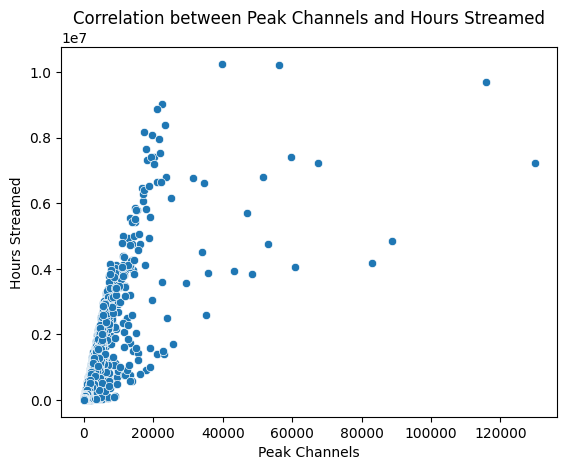

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Peak_channels', y='Hours_streamed', data=df)

plt.xlabel('Peak Channels')
plt.ylabel('Hours Streamed')
plt.title('Correlation between Peak Channels and Hours Streamed')
plt.show()

In [474]:
correlation = df['Peak_channels'].corr(df['Hours_streamed'])
print(f'Correlation between Peak Channels and Hours Streamed: {correlation}')

Correlation between Peak Channels and Hours Streamed: 0.7697224082780734


This correlation coefficient of 0.7697 indicates a strong positive relationship between 'Peak Channels' and 'Hours Streamed'. This means that as the number of peak channels increases, the number of hours streamed tends to increase as well, and vice versa.

A correlation coefficient value of 1 represents a perfect positive relationship, -1 a perfect negative relationship, and 0 indicates no correlation. Here, 0.7697 shows a substantial positive correlation.

It's not a surprising result that the more channels streaming a game at once, the more hours that game is going to have streamed. Let's see if it also applies to hours_watched, which will be a bit more insightful.

In [475]:
df = pd.read_sql_query('SELECT Peak_channels, Hours_watched FROM twitch', conn)

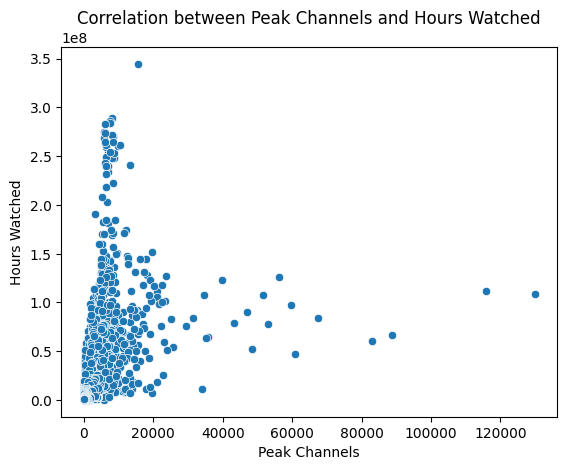

In [476]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Peak_channels', y='Hours_watched', data=df)

plt.xlabel('Peak Channels')
plt.ylabel('Hours Watched')
plt.title('Correlation between Peak Channels and Hours Watched')
plt.show()

In [477]:
correlation = df['Peak_channels'].corr(df['Hours_watched'])
print(f'Correlation between Peak Channels and Hours Watched: {correlation}')

Correlation between Peak Channels and Hours Watched: 0.5041658862595683


 correlation coefficient of 0.5042 indicates a moderate positive relationship between 'Peak Channels' and 'Hours Watched'. This means that as the number of peak channels increases, the total hours that game is watched also tends to increase, but not as strongly as with the 'Hours Streamed'.
 
 The correlation between 'Peak Channels' and 'Hours Streamed' is stronger than that between 'Peak Channels' and 'Hours Watched'. This might be because that even though more channels are streaming a particular game (increasing the 'Peak Channels'), this doesn't necessarily guarantee that the audience will be watching this game in larger numbers, which leads to a weaker correlation with 'Hours Watched'.

In [478]:
df = pd.read_sql_query('SELECT Peak_Viewers, Hours_streamed FROM twitch', conn)

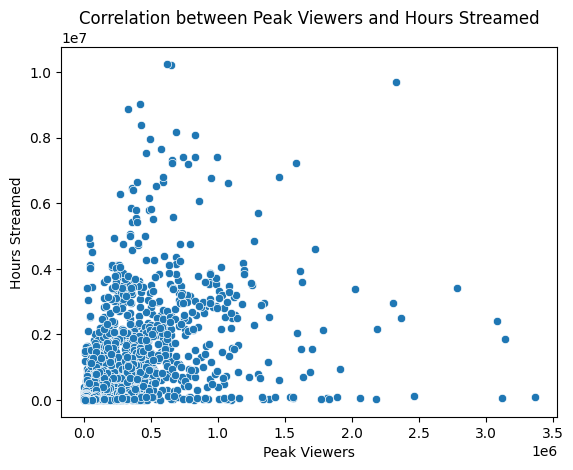

In [479]:
sns.scatterplot(x='Peak_viewers', y='Hours_streamed', data=df)

plt.xlabel('Peak Viewers')
plt.ylabel('Hours Streamed')
plt.title('Correlation between Peak Viewers and Hours Streamed')
plt.show()

In [480]:
correlation = df['Peak_viewers'].corr(df['Hours_streamed'])
print(f'Correlation between Peak Viewers and Hours Streamed: {correlation}')

Correlation between Peak Viewers and Hours Streamed: 0.5593312647778097


The correlation coefficient of about 0.559 indicates a positive moderate relationship between peak visitor numbers and transit hours. As the number of streaming hours increases, so does the number of peak views. However, this is not a very strong correlation and other factors also play an important role in determining the number of viewers. For example, the content of a stream, the time of day, and the popularity of the streamer can all affect viewership. 

For Peak Viewers-to-Channels Ratio vs. Hours Watched:

Peak Viewers-to-Channels Ratio vs. Hours Watched or Hours Streamed: This might provide insight into the efficiency of channels. Games with a high viewers-to-channels ratio could be more effective at gathering viewers, either due to the game's popularity or due to the influence of the channels themselves.

Correlation between Peak Viewers-to-Channels Ratio and Hours Watched: -0.055885225672294626


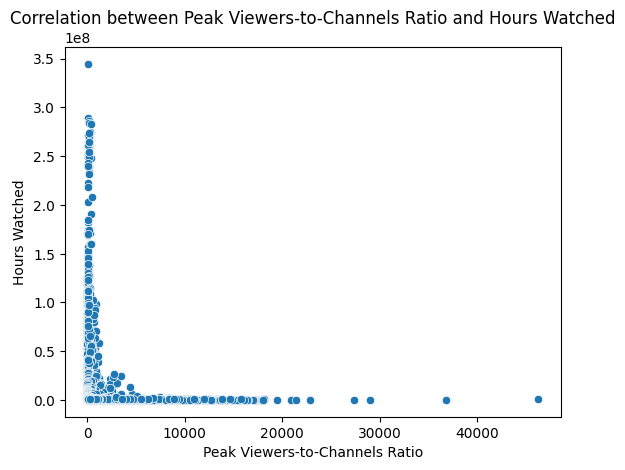

In [481]:
df = pd.read_sql_query('SELECT Peak_viewers, Peak_channels, Hours_watched, Hours_streamed FROM twitch', conn)

# Calculate Peak Viewers-to-Channels Ratio
df['avg_peak_ratio'] = df['Peak_viewers'] / df['Peak_channels']

# Ensure 'Hours_watched' is in your DataFrame
if 'Hours_watched' not in df.columns:
    df['Hours_watched'] = pd.read_sql_query('SELECT Hours_watched FROM twitch', conn)

# Calculate the correlation
correlation = df['avg_peak_ratio'].corr(df['Hours_watched'])
print(f"Correlation between Peak Viewers-to-Channels Ratio and Hours Watched: {correlation}")

# Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='avg_peak_ratio', y='Hours_watched', data=df)

plt.xlabel('Peak Viewers-to-Channels Ratio')
plt.ylabel('Hours Watched')
plt.title('Correlation between Peak Viewers-to-Channels Ratio and Hours Watched')
plt.show()

However, the correlation between the Peak Viewers-to-Channels Ratio and Hours Watched turned out to be close to zero. This suggests that there isn't a clear relationship between the number of viewers per channel and the total hours watched.

What does this mean in terms of channel efficiency? It suggests that a higher viewers-to-channels ratio doesn't necessarily lead to more hours watched. In other words, just because a game has a high peak viewers-to-channels ratio doesn't mean that viewers are sticking around to watch for longer periods.

This could mean several things:

Viewers might be briefly checking out channels with high viewer ratios but not staying for long, hence not contributing much to the total hours watched.

It's also possible that viewers are spread across different time zones, so while a channel may have a high peak viewers-to-channels ratio at a particular moment, the total hours watched might be distributed across different periods.

Another possibility is that the game's popularity, as indicated by a high peak viewers-to-channels ratio, does not directly influence the amount of time viewers are willing to spend watching the game.

Correlation between Peak Viewers-to-Channels Ratio and Hours Streamed: -0.07750827417264929


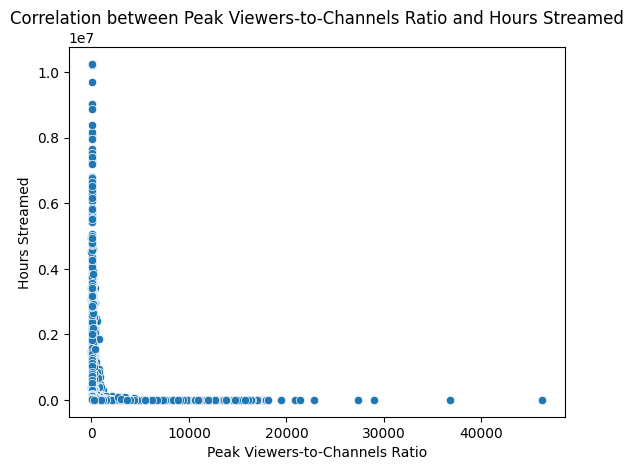

In [482]:
df = pd.read_sql_query('SELECT Peak_viewers, Peak_channels, Hours_watched, Hours_streamed FROM twitch', conn)

# Ensure 'Hours_streamed' is in your DataFrame
if 'Hours_streamed' not in df.columns:
    df['Hours_streamed'] = pd.read_sql_query('SELECT Hours_streamed FROM twitch', conn)

# Calculate Peak Viewers-to-Channels Ratio
df['avg_peak_ratio'] = df['Peak_viewers'] / df['Peak_channels']

# Calculate the correlation
correlation = df['avg_peak_ratio'].corr(df['Hours_streamed'])
print(f"Correlation between Peak Viewers-to-Channels Ratio and Hours Streamed: {correlation}")

# Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='avg_peak_ratio', y='Hours_streamed', data=df)

plt.xlabel('Peak Viewers-to-Channels Ratio')
plt.ylabel('Hours Streamed')
plt.title('Correlation between Peak Viewers-to-Channels Ratio and Hours Streamed')
plt.show()


The correlation value of -0.07750827417264929 suggests a very weak negative correlation between the peak viewers-to-channels ratio and the hours streamed on Twitch. Meaning as the hours streamed increase, the peak viewers-to-channels ratio tends to slightly decrease, but this relationship is very weak.

This could potentially suggest that streaming for more hours does not necessarily improve the viewers-to-channels ratio. The efficiency of channels in terms of attracting viewers doesn't seem to be strongly related to the amount of hours they stream.

The efficiency of a channel (as measured by the viewers-to-channels ratio) might be more influenced by other factors not captured in this data, such as the quality of the content, the popularity of the game being streamed, the time of streaming, the charisma or personality of the streamer, etc. In the future I would like to look at time of streaming to see if live streaming on Twitch gets most of it's views during other media's peak viewing hours, i.e. tv viewing spikes between 17:30-23:00

Further, this is a very weak correlation, and the actual impact of hours streamed on the viewers-to-channels ratio might be very small. This is just a preliminary analysis, and a more in-depth study would be needed to fully understand the relationship between these variables.

Now for the more interesting comparison- Peak-Viewer-Channel Ratio vs. average viewer. If there is a positive correlation that would indicate games which are more popular overall also have individual channels that are more popular on average. Conversly, a weak or negative correlation could suggest that the overall popularity of a game and the average popularity of its channels are not closely related.

Correlation between Peak Viewers-to-Channels Ratio and Average Viewers: -0.055940012906949305


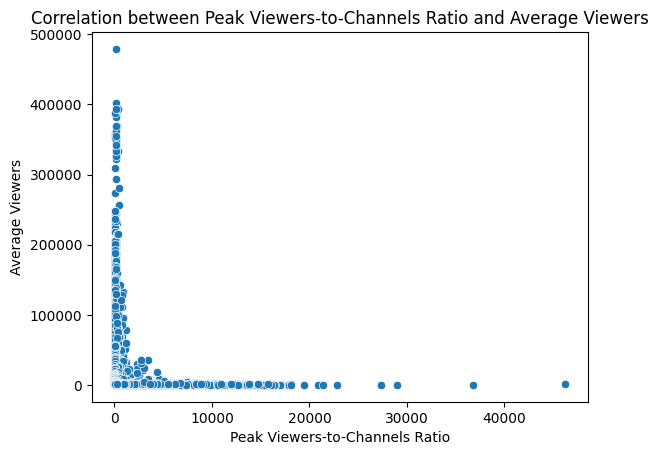

In [483]:
df = pd.read_sql_query('SELECT Peak_viewers, Peak_channels, Avg_viewers FROM twitch', conn)

# Calculate the viewers to channels ratio again
df['peak_ratio'] = df['Peak_viewers'] / df['Peak_channels']

# Calculate the correlation
correlation = df['peak_ratio'].corr(df['Avg_viewers'])
print(f"Correlation between Peak Viewers-to-Channels Ratio and Average Viewers: {correlation}")

# Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='peak_ratio', y='Avg_viewers', data=df)

plt.xlabel('Peak Viewers-to-Channels Ratio')
plt.ylabel('Average Viewers')
plt.title('Correlation between Peak Viewers-to-Channels Ratio and Average Viewers')
plt.show()

The correlation between peak viewers-to-channels Ratio and average viewers is about -0.056. This is a very small negative correlation, which suggests that there is not a strong linear relationship between these two variables.

This means that a game with a high peak viewers-to-channels ratio does not necessarily mean it will have a high average viewer count. In other words, the efficiency of channels (as measured by the Peak Viewers-to-Channels ratio) does not strongly influence the average viewership of the game.

This could be for a number of reasons. For instance, it might be that games with a lower viewers-to-channels ratio have a more consistent viewership across different channels, leading to a higher average viewership overall. Alternatively, it could simply be that other factors (such as the overall popularity of the game, the time of day, the presence of popular streamers, etc.) are more important in determining the average viewership.

Regardless, these are valuable insights for understanding the dynamics of Twitch viewership. For streamers and businesses, this might mean that focusing solely on games with a high peak viewers-to-channels ratio may not necessarily lead to a high average viewership. Other strategies, such as considering the overall popularity of the game or the consistency of viewership, might be more effective.

But honestly, I thought there would be a slight postive correlatin between peak viewers-to-channels ratio and average viewers!

While some intuitive correlations hold (like more channels leading to more streaming hours), others don't quite follow expectations (like higher viewers-to-channels ratio not leading to higher average viewership or longer viewing hours). These insights highlight the multifaceted nature of Twitch viewership and the need for a nuanced approach to understanding and engaging with Twitch's audience.

Next I'll investigate the following question: What game genres are favorites among streamers and viewers? How does their review score compare?

In [484]:
# make sure joining on the same column
# rename the 'Name' column in the 'video_games' table to 'Game'
c = conn.cursor()
c.execute("ALTER TABLE video_games RENAME COLUMN Name TO Game;")

# Now, let's join both tables on the 'Game' column
query = """
    SELECT v.Genres, SUM(t.Hours_watched) as Total_hours_watched, SUM(t.Streamers) as Total_streamers, AVG(v.Review_score) as Avg_review_score
    FROM video_games v
    JOIN twitch t
    ON v.Game = t.Game
    GROUP BY v.Genres;
"""
df = pd.read_sql_query(query, conn)

print(df.head())

                                              Genres  Total_hours_watched   
0                                               None           1359656193  \
1                               2D puzzle platformer               165691   
2                                             Action             40707155   
3  Action RPG, Dungeon Crawl, Hack and Slash, Horror               521284   
4                                  Action, Adventure            216759557   

   Total_streamers  Avg_review_score  
0          5382417         65.457746  
1              101         78.000000  
2           154688         56.024390  
3              334         81.000000  
4          1580060         82.351695  


Based on this, we can see that the "Action, Adventure" genre has had a high number of hours watched (216,759,557 hours), and it has been streamed by a large number of streamers (1,580,060 streamers), suggesting that it is a popular genre among both viewers and streamers. It also has a fairly high average review score of 82.35, indicating that it is well received by the player base.

The "Action" genre alone has also had a notable amount of hours watched (40,707,155 hours) and has been streamed by a significant number of streamers (154,688 streamers). However, it has a lower average review score of 56.02, which suggests that, despite its popularity on Twitch, it may not be as well received by players as other genres.

On the other hand, "2D puzzle platformer" and "Action RPG, Dungeon Crawl, Hack and Slash, Horror" genres have had fewer hours watched and fewer streamers, but they have high average review scores of 78 and 81 respectively. This might suggest that these genres are well received by those who play them, even if they don't attract as large of a viewership or streamership on Twitch.

The genre with the highest average review score (and a significant number of hours watched and streamers) could be considered the favorite among streamers and viewers.

In [485]:
cursor = conn.cursor()

# execute the SQL query
cursor.execute('''
SELECT 
    Genres,
    CAST(Total_hours_watched AS FLOAT) / COUNT(*) as Avg_hours_watched_per_game
FROM 
    (SELECT 
        v.Genres, 
        SUM(t.Hours_watched) as Total_hours_watched 
     FROM 
        video_games v 
     JOIN 
        twitch t 
     ON 
        v.Game = t.Game
     GROUP BY 
        v.Genres) 
GROUP BY 
    Genres
''')

# fetch column descriptions
columns = [column[0] for column in cursor.description]

print(columns)

# fetch and print the results
results = cursor.fetchall()
for row in results:
    print(row)

['Genres', 'Avg_hours_watched_per_game']
(None, 1359656193.0)
('2D puzzle platformer', 165691.0)
('Action', 40707155.0)
('Action RPG, Dungeon Crawl, Hack and Slash, Horror', 521284.0)
('Action, Adventure', 216759557.0)
('Action, Adventure, Beat em Up', 4265579.0)
('Action, Adventure, City-Building, Open World, Role-Playing, Sandbox, Simulation', 3269078.0)
('Action, Adventure, Hack and Slash', 69539649.0)
('Action, Adventure, Horror', 7322389.0)
('Action, Adventure, Horror, Survival', 8703710.0)
('Action, Adventure, Open World', 8189219.0)
('Action, Adventure, Open World, Shooter', 6481351.0)
('Action, Adventure, Open World, Survival Horror', 11979399.0)
('Action, Adventure, Platform', 10439334.0)
('Action, Adventure, Roguelike', 294685.0)
('Action, Adventure, Role-Playing', 65702591.0)
('Action, Adventure, Sandbox', 761420.0)
('Action, Adventure, Shooter', 531435.0)
('Action, Adventure, Stealth', 6257474.0)
('Action, Adventure, Survival', 43871911.0)
('Action, Adventure, Survival Horr

Let's view only based on the first listed descriptor for genre

In [486]:
cursor = conn.cursor()

# execute the SQL query
cursor.execute('''
SELECT 
    SUBSTR(Genres, 1, INSTR(Genres, ',') - 1) as Main_Genre,
    CAST(Total_hours_watched AS FLOAT) / COUNT(*) as Avg_hours_watched_per_game
FROM 
    (SELECT 
        v.Genres, 
        SUM(t.Hours_watched) as Total_hours_watched 
     FROM 
        video_games v 
     JOIN 
        twitch t 
     ON 
        v.Game = t.Game
     GROUP BY 
        v.Genres) 
GROUP BY 
    Main_Genre
''')

# fetch column descriptions
columns = [column[0] for column in cursor.description]

print(columns)

# fetch and print the results
results = cursor.fetchall()
for row in results:
    print(row)

['Main_Genre', 'Avg_hours_watched_per_game']
(None, 1359656193.0)
('', 3525.340425531915)
('Action', 4515824.104166667)
('Action RPG', 521284.0)
('Adventure', 14810.736842105263)
('Arcade', 12962238.333333334)
('Battle Arena', 417009334.5)
('Beat em Up', 1486640.0)
('Board Game', 1620318.0)
('Card Battle', 339369380.0)
('Card Game', 1782284.0)
('City-Building', 7726848.0)
('Compilation', 145350.0)
('Fighting', 105262834.0)
('First-Person', 238382.3111111111)
('First-person shooter', 104431.5)
('Flight', 37602228.0)
('Hack and Slash', 151864.5)
('Hack and slash', 669425.0)
('Horror', 20242259.0)
('Isometric', 164983.5)
('Management', 172066.0)
('Massively Multiplayer', 12213776.166666666)
('Medical simulation', 242274.0)
('Multidirectional', 165845.0)
('On-Rails', 162777.0)
('Open World', 213488.33333333334)
('Party', 70012060.5)
('Platform', 269444.4)
('Point-and-Click', 664913.75)
('Puzzle', 38886715.0)
('Racing', 86015909.0)
('Racing/Driving', 65700250.0)
('Real-Time', 1165005.666666

Games in the 'Battle Arena' genre have the highest average hours watched per game, followed by the 'Card Battle' genre.
'Action' games also have a high average hours watched per game.

Genres like 'First-Person', 'Open World', and 'Role-Playing' have lower averages.

I just realized that there is "Hack and Slash" and "Hack and slash". Let's redo these calculations, but normalize data so all games just come in all lower-case

In [487]:
cursor = conn.cursor()

# execute the SQL query
cursor.execute('''
SELECT 
    LOWER(Main_Genre) as Main_Genre,
    CAST(Total_hours_watched AS FLOAT) / COUNT(*) as Avg_hours_watched_per_game
FROM 
    (SELECT 
        LOWER(SUBSTR(vg.Genres, 0, INSTR(vg.Genres || ',', ','))) as Main_Genre, 
        SUM(t.Hours_watched) as Total_hours_watched 
     FROM 
        video_games vg 
     JOIN 
        twitch t 
     ON 
        vg.Game = t.Game
     GROUP BY 
        Main_Genre) 
GROUP BY 
    Main_Genre
''')

# fetch and print the results
results = cursor.fetchall()
for result in results:
    print(result)

(None, 1359656193.0)
('2d puzzle platformer', 165691.0)
('action', 17994474953.0)
('action rpg', 521284.0)
('action-adventure', 1210143.0)
('adventure', 212560454.0)
('arcade', 40195360.0)
('battle arena', 1158433830.0)
('beat em up', 12846198.0)
('board game', 729696899.0)
('card battle', 339369380.0)
('card game', 583504100.0)
('city-building', 29064081.0)
('compilation', 145350.0)
('fighting', 773451069.0)
('first-person', 24525427899.0)
('first-person shooter', 389710.0)
('flight', 37602228.0)
('flight combat', 33726522.0)
('full motion video (fmv)', 591292.0)
('hack and slash', 55530078.0)
('horror', 25327625.0)
('interactive art', 318085.0)
('isometric', 91779093.0)
('management', 43264287.0)
('massively multiplayer', 7552911682.0)
('medical simulation', 242274.0)
('mmorpg', 103280023.0)
('moba', 4292781.0)
('multidirectional', 165845.0)
('music/rhythm', 99714465.0)
('on-rails', 162777.0)
('open world', 501817076.0)
('party', 227745872.0)
('pinball', 188826.0)
('platform', 174213

There are also some genres where the name is not clear ('', 'None') - these might be games where the genre information is missing or not provided. Let's just peak at the games in 'None'

In [488]:
cursor = conn.cursor()

# execute the SQL query
cursor.execute('''
SELECT 
    Game
FROM 
    video_games
WHERE 
    Genres IS NULL OR Genres = ''
''')

# fetch and print the results
results = cursor.fetchall()
for row in results:
    print(row)

("Assassin's Creed: Revelations",)
('Among Us',)
('Metro 2033',)
('Helltaker',)
('The Stanley Parable: Ultra Deluxe',)
('Kingdom Two Crowns',)
('Bloons TD 6',)
('S.T.A.L.K.E.R.: Shadow of Chernobyl',)
('Half-Life: Source',)
('Crysis 2',)
('Yakuza 3',)
('Half-Life 2: Lost Coast',)
('Deathloop',)
('Counter-Strike',)
('Turnip Boy Commits Tax Evasion',)
('Gothic - Playable Teaser',)
('S.T.A.L.K.E.R.: Call of Pripyat',)
('Judgment',)
('Vanquish',)
('Fallout Tactics: Brotherhood of Steel',)
('XCOM: Chimera Squad',)
('Maneater',)
('Sonic & All-Stars Racing Transformed',)
('S.T.A.L.K.E.R.: Clear Sky',)
('The Legend of Zelda: Ocarina of Time 3D',)
('Sins of a Solar Empire: Rebellion',)
('Age of Empires II: Definitive Edition',)
('Untitled Goose Game',)
('BattleTech',)
('Katamari Damacy Reroll',)
('Rustler',)
('Cloudpunk',)
('Barotrauma',)
('The Henry Stickmin Collection',)
('Overlord',)
('Tinykin',)
('Overlord II',)
('Warhammer 40,000: Dawn of War II',)
('Star Wars Jedi Knight: Dark Forces II',

Now calculate the average number of streamers per game for each main genre

In [489]:
cursor = conn.cursor()

# execute the SQL query
cursor.execute('''
SELECT 
    LOWER(Main_Genre) as Main_Genre,
    CAST(Total_streamers AS FLOAT) / COUNT(*) as Avg_streamers_per_game
FROM 
    (SELECT 
        LOWER(SUBSTR(vg.Genres, 0, INSTR(vg.Genres || ',', ','))) as Main_Genre, 
        SUM(t.Streamers) as Total_streamers 
     FROM 
        video_games vg 
     JOIN 
        twitch t 
     ON 
        vg.Game = t.Game
     GROUP BY 
        Main_Genre) 
GROUP BY 
    Main_Genre
''')

# fetch and print the results
results = cursor.fetchall()
for result in results:
    print(result)

(None, 5382417.0)
('2d puzzle platformer', 101.0)
('action', 72767375.0)
('action rpg', 334.0)
('action-adventure', 365.0)
('adventure', 1083758.0)
('arcade', 58785.0)
('battle arena', 3011883.0)
('beat em up', 135998.0)
('board game', 780646.0)
('card battle', 463064.0)
('card game', 866602.0)
('city-building', 131817.0)
('compilation', 3174.0)
('fighting', 2816794.0)
('first-person', 120394589.0)
('first-person shooter', 69.0)
('flight', 211064.0)
('flight combat', 419862.0)
('full motion video (fmv)', 984.0)
('hack and slash', 473374.0)
('horror', 108793.0)
('interactive art', 569.0)
('isometric', 186159.0)
('management', 107317.0)
('massively multiplayer', 14928646.0)
('medical simulation', 28.0)
('mmorpg', 251085.0)
('moba', 15520.0)
('multidirectional', 228.0)
('music/rhythm', 2270152.0)
('on-rails', 119.0)
('open world', 1905862.0)
('party', 1998471.0)
('pinball', 121.0)
('platform', 306824.0)
('point-and-click', 380383.0)
('puzzle', 164808.0)
('racing', 948463.0)
('racing/drivi

These numbers represent the average number of streamers per game in each genre.

For example, in the 'Action' genre, there are approximately 32,918 streamers on average per game. This figure is calculated by summing the total number of streamers for all games in the 'Action' genre, and then dividing by the number of 'Action' games.

Similarly, 'Adventure' games have approximately 23 streamers on average per game.

In the 'Battle Arena' genre, each game has a much higher average number of streamers, around 854,259. This is likely due to popular games in this genre such as 'League of Legends' and 'Dota 2', which have a large number of streamers and viewers on Twitch.

These figures give an idea of the relative popularity of different genres among streamers on Twitch.

Now let's investigate a few things here and tie this into the average game review.

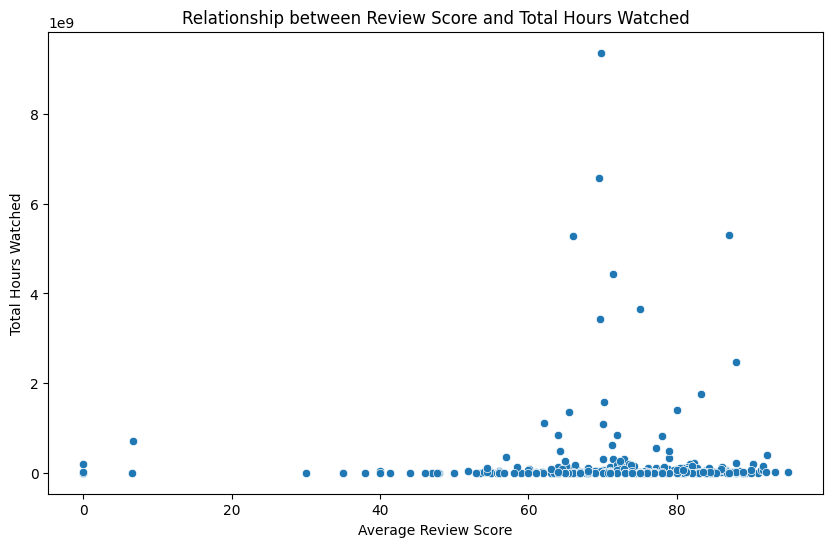

In [490]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6)) # Size of the plot
sns.scatterplot(x='Avg_review_score', y='Total_hours_watched', data=df)
plt.title('Relationship between Review Score and Total Hours Watched')
plt.xlabel('Average Review Score')
plt.ylabel('Total Hours Watched')
plt.show()

In [491]:
correlation_matrix = df[['Avg_review_score', 'Total_hours_watched']].corr()

# Print the correlation between average review score and total hours watched
print("Correlation coefficient:", correlation_matrix.loc['Avg_review_score', 'Total_hours_watched'])

Correlation coefficient: 0.013444264338935405


The correlation coefficient is very close to 0. This indicates that there is no linear correlation between the average review score and the total hours watched on Twitch for the video games in your dataset.

So a game receiving a high or low review score does not necessarily determine whether it will be watched for more or fewer hours on Twitch. The popularity of a game on Twitch (in terms of hours watched) appears to be largely independent of its review scores based on this data.

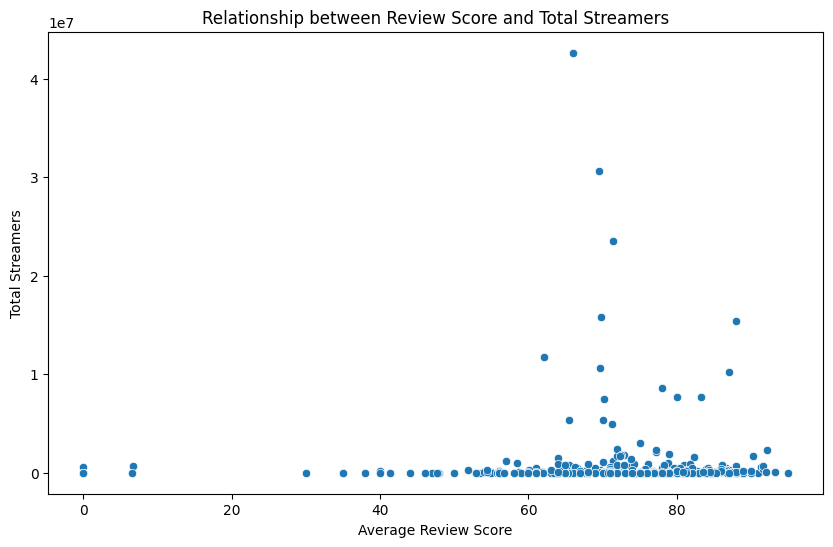

Correlation coefficient: 0.014775544087143938


In [492]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6)) # Size of the plot
sns.scatterplot(x='Avg_review_score', y='Total_streamers', data=df)
plt.title('Relationship between Review Score and Total Streamers')
plt.xlabel('Average Review Score')
plt.ylabel('Total Streamers')
plt.show()

# Calculate and print the correlation coefficient
correlation_coefficient = df['Avg_review_score'].corr(df['Total_streamers'])
print('Correlation coefficient:', correlation_coefficient)

The correlation coefficient you calculated, 0.0148, is very close to 0. This indicates that there is a very weak positive correlation between the average review score of a game and the total number of streamers who streamed that game. In other words, the data does not suggest a strong relationship where games with higher review scores are streamed by more streamers.

Even if there were a stronger correlation, it would not necessarily mean that a higher review score causes more streaming of a game. Other factors may influence both the review score and the streaming popularity. Also, this is a simplistic analysis; there might be a more complex relationship that isn't captured by a linear correlation coefficient. For example, there could be a certain threshold of review scores above which streaming increases substantially. More sophisticated statistical analysis techniques could explore these possibilities.

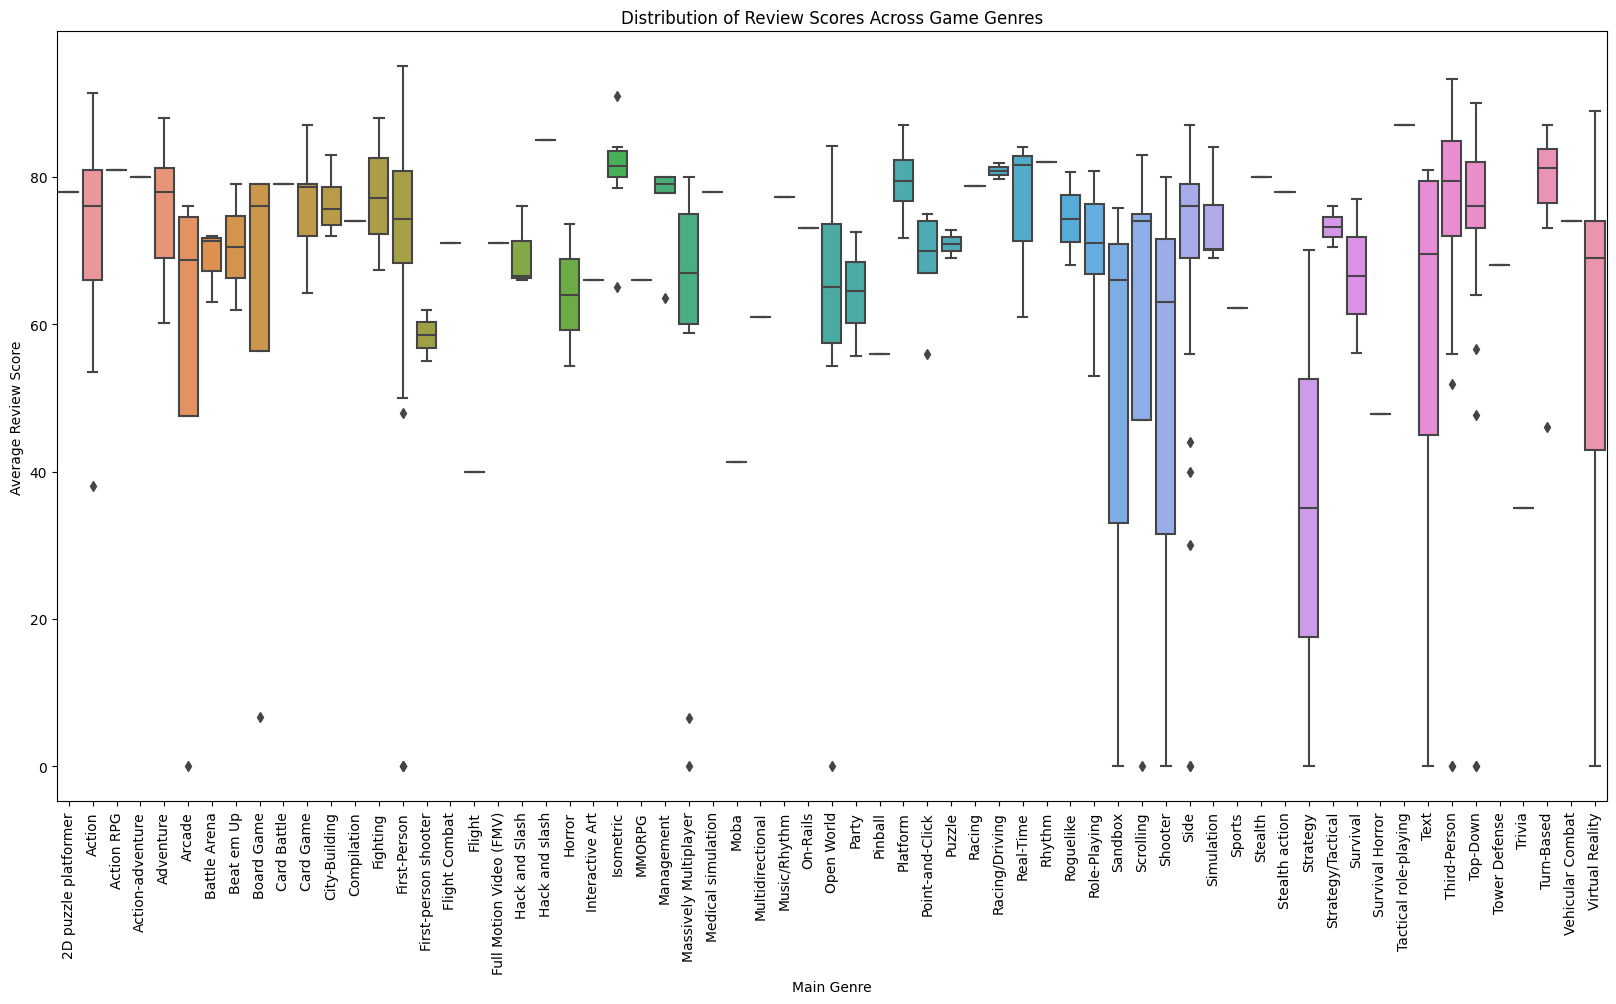

In [493]:
df['Main_Genre'] = df['Genres'].str.split(',').str[0]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust the size as needed.
sns.boxplot(x='Main_Genre', y='Avg_review_score', data=df)
plt.title('Distribution of Review Scores Across Game Genres')
plt.xlabel('Main Genre')
plt.ylabel('Average Review Score')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [494]:
# First we make sure that 'Avg_review_score' is numerical
df['Avg_review_score'] = df['Avg_review_score'].astype(float)

# Group by 'Main_Genre', and for each group, find the row (game) with the max 'Avg_review_score'
top_games = df.loc[df.groupby('Main_Genre')['Avg_review_score'].idxmax()]

# Display the top game in each genre
print(top_games[['Main_Genre', 'Genres', 'Avg_review_score']])

                  Main_Genre   
1       2D puzzle platformer  \
15                    Action   
3                 Action RPG   
52          Action-adventure   
54                 Adventure   
74                    Arcade   
78              Battle Arena   
81                Beat em Up   
84                Board Game   
86               Card Battle   
88                 Card Game   
93             City-Building   
96               Compilation   
98                  Fighting   
188             First-Person   
190     First-person shooter   
193                   Flight   
192            Flight Combat   
194  Full Motion Video (FMV)   
196           Hack and Slash   
198           Hack and slash   
200                   Horror   
201          Interactive Art   
204                Isometric   
212                   MMORPG   
214               Management   
223    Massively Multiplayer   
231       Medical simulation   
232                     Moba   
233         Multidirectional   
234     

In [495]:
!pip install pandasql

In [496]:
import pandas as pd
import pandasql as ps

# Set max rows display to None
pd.set_option('display.max_rows', None)

query = """
    SELECT Main_Genre, AVG(Avg_review_score) as Average_Review
    FROM df
    GROUP BY Main_Genre
    ORDER BY Average_Review DESC;
"""

result = ps.sqldf(query)

print(result)

                 Main_Genre  Average_Review
0     Tactical role-playing       87.000000
1            Hack and slash       85.000000
2                    Rhythm       82.000000
3                Action RPG       81.000000
4            Racing/Driving       80.750167
5                 Isometric       80.750000
6                   Stealth       80.000000
7          Action-adventure       80.000000
8                  Platform       79.466667
9               Card Battle       79.000000
10                   Racing       78.809524
11           Stealth action       78.000000
12       Medical simulation       78.000000
13     2D puzzle platformer       78.000000
14               Turn-Based       77.686882
15                 Fighting       77.526049
16             Music/Rhythm       77.265487
17            City-Building       76.541667
18             Third-Person       76.520211
19                Card Game       76.157746
20               Management       76.066667
21                Adventure     

In [497]:
# Make sure 'Avg_review_score', 'Total_hours_watched', and 'Total_streamers' are numerical
df['Avg_review_score'] = df['Avg_review_score'].astype(float)
df['Total_hours_watched'] = df['Total_hours_watched'].astype(float)
df['Total_streamers'] = df['Total_streamers'].astype(float)

# Group by 'Main_Genre' and calculate the average review score, total hours watched and total streamers
grouped_df = df.groupby('Main_Genre').agg({'Avg_review_score': 'mean', 'Total_hours_watched': 'sum', 'Total_streamers': 'sum'}).reset_index()

# Rename columns for clarity
grouped_df.rename(columns = {'Avg_review_score':'Average_Review', 'Total_hours_watched':'Total_Hours_Watched', 'Total_streamers':'Total_Streamers'}, inplace = True)

# Display the resulting DataFrame
print(grouped_df)


                 Main_Genre  Average_Review  Total_Hours_Watched   
0      2D puzzle platformer       78.000000         1.656910e+05  \
1                    Action       73.037471         1.799447e+10   
2                Action RPG       81.000000         5.212840e+05   
3          Action-adventure       80.000000         1.210143e+06   
4                 Adventure       75.875895         2.125605e+08   
5                    Arcade       53.333333         4.019536e+07   
6              Battle Arena       68.782258         1.158434e+09   
7                Beat em Up       70.500000         1.284620e+07   
8                Board Game       59.414804         7.296969e+08   
9               Card Battle       79.000000         3.393694e+08   
10                Card Game       76.157746         5.835041e+08   
11            City-Building       76.541667         2.906408e+07   
12              Compilation       74.000000         1.453500e+05   
13                 Fighting       77.526049     

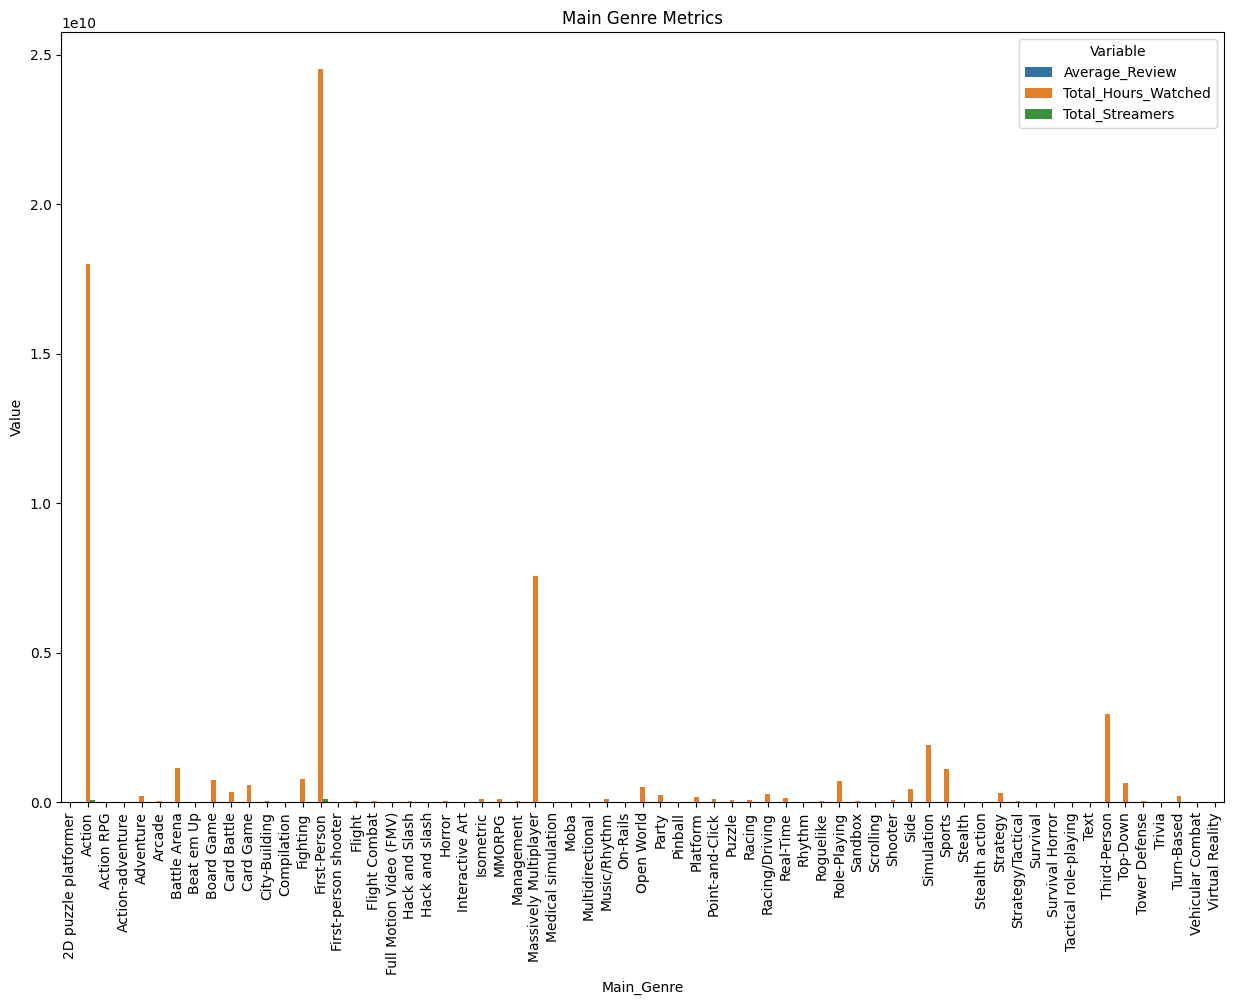

In [498]:
import matplotlib.pyplot as plt
import pandas as pd
import pandasql as ps

# First, group data and calculate necessary values
query = """
    SELECT Main_Genre, AVG(Avg_review_score) as Average_Review, SUM(Total_hours_watched) as Total_Hours_Watched, SUM(Total_streamers) as Total_Streamers
    FROM df
    GROUP BY Main_Genre;
"""

grouped_df = ps.sqldf(query)

# Now, reshape the data using melt function
melted_df = grouped_df.melt(id_vars='Main_Genre', var_name='Variable', value_name='Value')

# Plotting
plt.figure(figsize=(15, 10))
plt.title('Main Genre Metrics')
sns.barplot(x='Main_Genre', y='Value', hue='Variable', data=melted_df)
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.show()

right I obviously need to scale the data logarithmically. i.e. let's scale the data so each tick mark is a constant

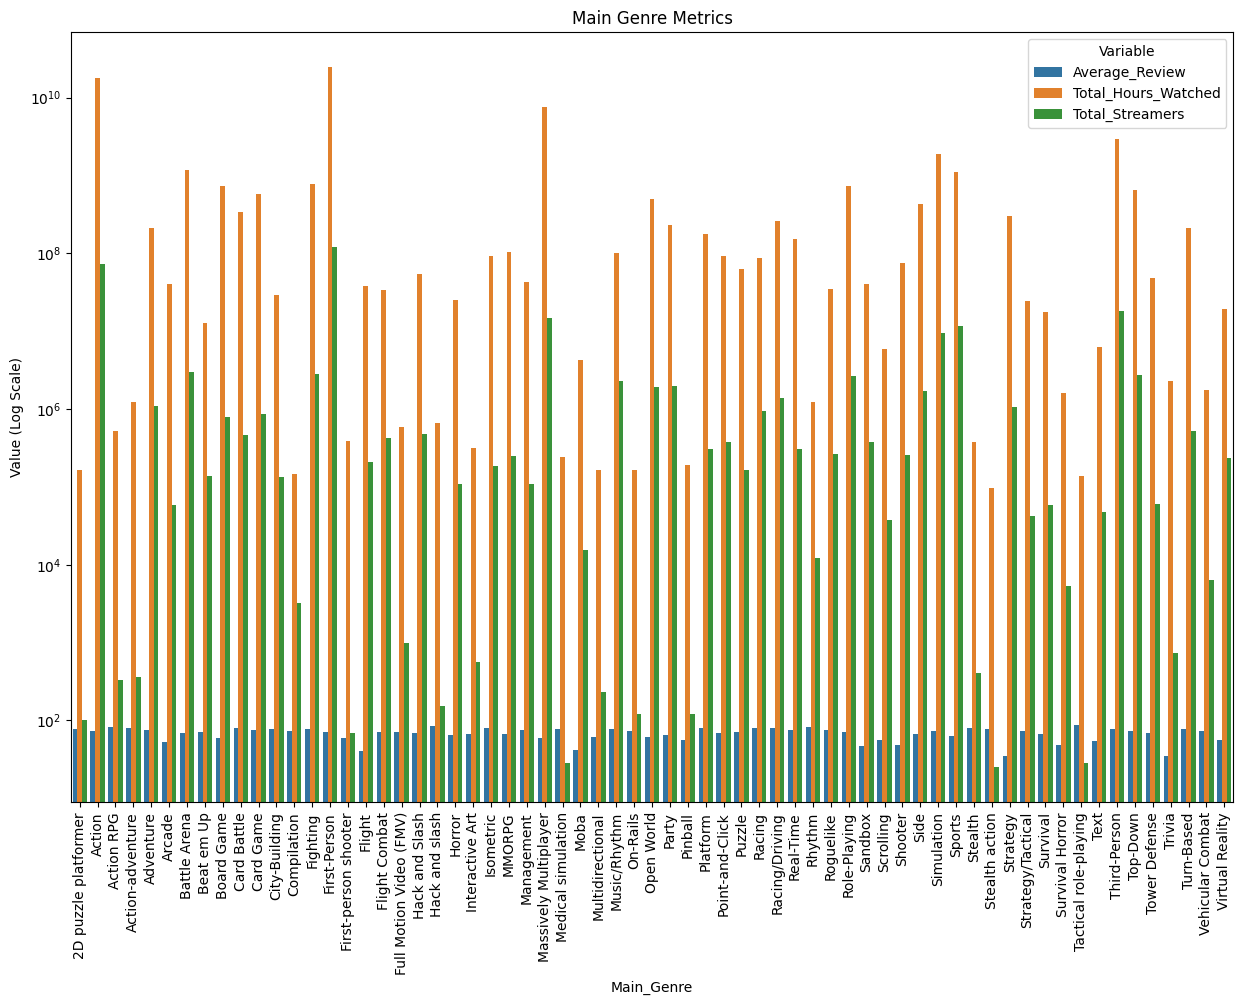

In [499]:
# Plotting
plt.figure(figsize=(15, 10))
plt.title('Main Genre Metrics')
plot = sns.barplot(x='Main_Genre', y='Value', hue='Variable', data=melted_df)
plot.set_yscale("log")  # Set the y-axis to a logarithmic scale
plt.xticks(rotation=90)
plt.ylabel('Value (Log Scale)')
plt.show()

one quick observation, it looks like medical simulation has a much lower proportion of hours streamed vs. total hours watched which probably points to long play sessions or fewer streamers, but more viewers.

Let's take the top 10 reviewed genres and see what that looks like

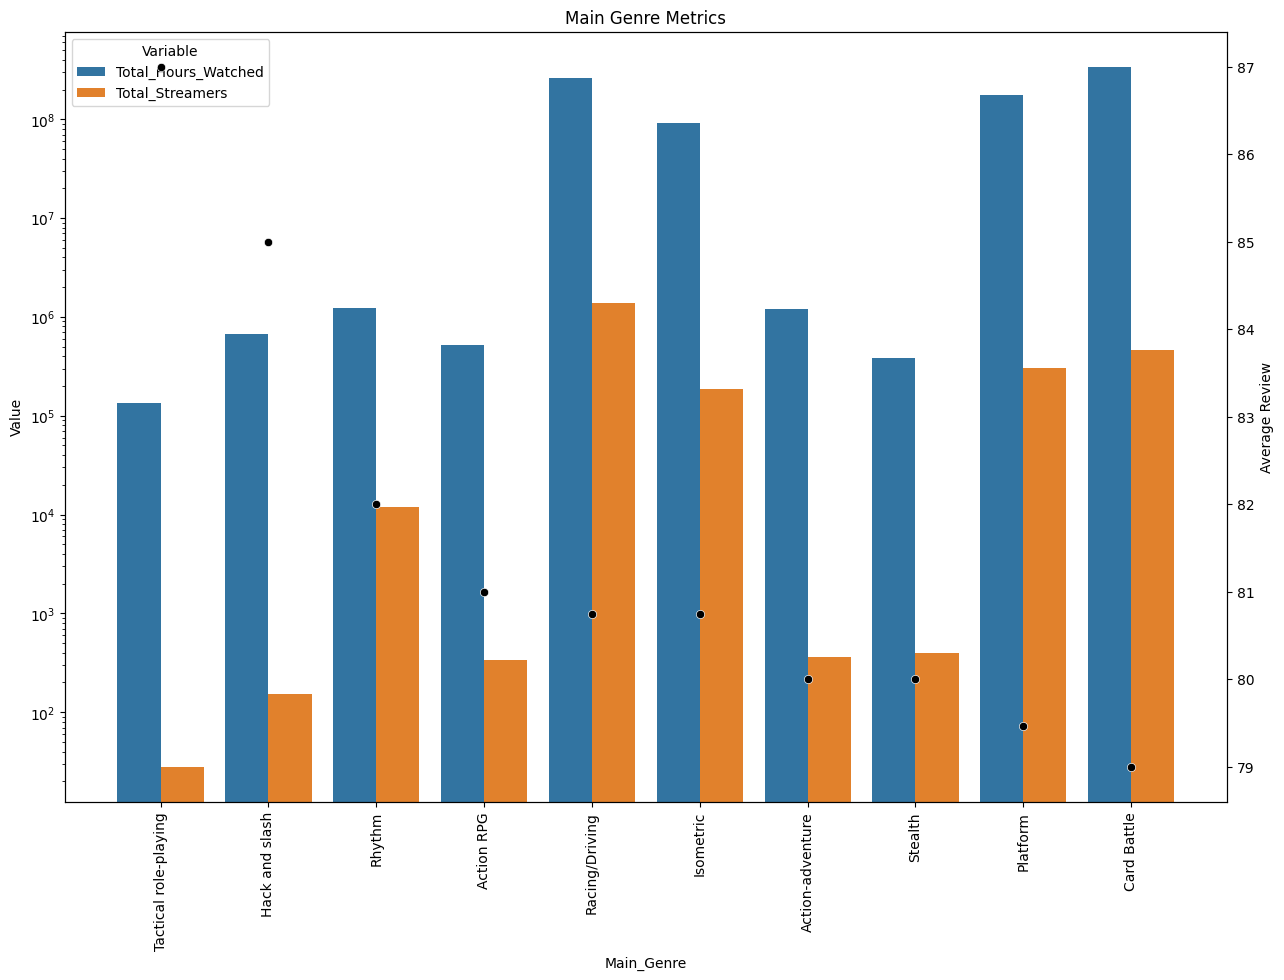

In [500]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandasql as ps

# First, group data and calculate necessary values
query = """
    SELECT Main_Genre, AVG(Avg_review_score) as Average_Review, SUM(Total_hours_watched) as Total_Hours_Watched, SUM(Total_streamers) as Total_Streamers
    FROM df
    GROUP BY Main_Genre;
"""
grouped_df = ps.sqldf(query)

# Sort by Average_Review and select top 10
grouped_df = grouped_df.sort_values('Average_Review', ascending=False).head(10)

# Now, reshape the data using melt function excluding Average_Review for the barplot
melted_df = grouped_df.drop(columns='Average_Review').melt(id_vars='Main_Genre', var_name='Variable', value_name='Value')

# Sort the melted dataframe by Average_Review (in descending order) before plotting
# 'Main_Genre' column from melted_df corresponds to the genres in sorted order
melted_df['Main_Genre'] = pd.Categorical(melted_df['Main_Genre'], categories=grouped_df['Main_Genre'], ordered=True)
melted_df = melted_df.sort_values('Main_Genre')

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 10))

# First plot for Total_Hours_Watched and Total_Streamers
sns.barplot(x='Main_Genre', y='Value', hue='Variable', data=melted_df, ax=ax1)
plt.xticks(rotation=90)

ax1.set_ylabel('Value')
ax1.set_yscale('log')  # Apply logarithmic scale to y-axis for the bar plot

# Second plot for Average_Review
ax2 = ax1.twinx()
sns.scatterplot(x='Main_Genre', y='Average_Review', data=grouped_df, color='black', ax=ax2)
ax2.set_ylabel('Average Review')

plt.title('Main Genre Metrics')
plt.show()

In [501]:
# Create a copy of the dataframe for display
display_df = grouped_df.copy()

# Convert numerical columns to a more readable format
display_df['Total_Hours_Watched'] = display_df['Total_Hours_Watched'].apply(lambda x: '{:,.0f}'.format(x))
display_df['Total_Streamers'] = display_df['Total_Streamers'].apply(lambda x: '{:,.0f}'.format(x))
display_df['Average_Review'] = display_df['Average_Review'].apply(lambda x: '{:.2f}'.format(x))

# Reorder the columns for a more logical display
display_df = display_df[['Main_Genre', 'Average_Review', 'Total_Hours_Watched', 'Total_Streamers']]

# Display the table
print(display_df)

               Main_Genre Average_Review Total_Hours_Watched Total_Streamers
57  Tactical role-playing          87.00             135,959              28
21         Hack and slash          85.00             669,425             154
42                 Rhythm          82.00           1,223,821          12,043
3              Action RPG          81.00             521,284             334
40         Racing/Driving          80.75         262,069,011       1,375,194
24              Isometric          80.75          91,779,093         186,159
4        Action-adventure          80.00           1,210,143             365
51                Stealth          80.00             379,603             400
36               Platform          79.47         174,213,064         306,824
10            Card Battle          79.00         339,369,380         463,064


Another strategy I could have taken was picking the threshold for a "high score" and then give it a binary column and compare that to hours watched! See below:

In [536]:
query = """
SELECT 
    CASE 
        WHEN instr(Genres, ',') > 0 THEN substr(Genres, 1, instr(Genres, ',') - 1)
        ELSE Genres
    END AS Main_genre,
    CASE
        WHEN Review_score >= 80 THEN 1
        ELSE 0
    END AS High_score,
    AVG(Hours_watched) as Avg_Hours_Watched
FROM 
    (SELECT * FROM twitch
    INNER JOIN video_games
    ON twitch.Game = video_games.Name)
GROUP BY Main_genre, High_score;
"""

result = pd.read_sql_query(query, conn)
result

Main_genre  High_score  Avg_Hours_Watched
0                       None           0       2.743070e+06
1                       None           1       7.389509e+05
2       2D puzzle platformer           0       1.656910e+05
3                     Action           0       2.212186e+07
4                     Action           1       1.245581e+06
5                 Action RPG           1       2.606420e+05
6           Action-adventure           0       3.604105e+05
7           Action-adventure           1       2.446610e+05
8                  Adventure           0       7.425722e+05
9                  Adventure           1       9.449148e+05
10                    Arcade           0       1.674807e+06
11              Battle Arena           0       6.619622e+06
12                Beat em Up           0       1.605775e+06
13                Board Game           0       3.393939e+06
14               Card Battle           0       3.900797e+06
15                 Card Game           0       1.668747e+06
16                 Card Game           1       1.216777e+06
17             City-Building           0       6.105352e+05
18             City-Building           1       1.151419e+06
19               Compilation           0       1.453500e+05
20                  Fighting           0       1.427000e+06
21                  Fighting           1       1.812037e+06
22              First-Person           0       7.625447e+06
23              First-Person           1       1.539170e+07
24      First-person shooter           0       1.948550e+05
25                    Flight           0       1.105948e+06
26                    Flight           1       1.105948e+06
27             Flight Combat           0       6.132095e+05
28   Full Motion Video (FMV)           0       5.912920e+05
29            Hack and Slash           0       1.108482e+06
30            Hack and Slash           1       8.267475e+05
31            Hack and slash           1       3.347125e+05
32                    Horror           0       9.104492e+05
33                    Horror           1       3.476843e+05
34           Interactive Art           0       3.180850e+05
35                 Isometric           0       1.053273e+06
36                 Isometric           1       2.983198e+06
37                    MMORPG           0       1.200930e+06
38                Management           0       1.477473e+06
39                Management           1       1.195543e+06
40     Massively Multiplayer           0       5.630307e+06
41     Massively Multiplayer           1       1.506840e+07
42        Medical simulation           0       2.422740e+05
43                      Moba           0       2.044181e+05
44          Multidirectional           0       1.658450e+05
45              Music/Rhythm           0       8.886390e+05
46              Music/Rhythm           1       6.547240e+05
47                  On-Rails           0       1.627770e+05
48                Open World           0       2.241878e+06
49                Open World           1       1.148989e+06
50                     Party           0       2.579336e+06
51                     Party           1       7.642990e+05
52                   Pinball           0       1.888260e+05
53                  Platform           0       9.257810e+05
54                  Platform           1       7.335748e+05
55           Point-and-Click           0       6.497003e+05
56           Point-and-Click           1       8.043670e+05
57                    Puzzle           0       1.240345e+06
58                    Puzzle           1       1.054612e+06
59                    Racing           0       8.363190e+05
60                    Racing           1       2.371223e+05
61            Racing/Driving           0       1.463630e+06
62            Racing/Driving           1       1.200297e+06
63                 Real-Time           0       1.294937e+06
64                 Real-Time           1       1.005949e+06
65                    Rhythm           1       2.039702e+0

Tactical role-playing: Despite having the highest average review score of 87, it only has a small total of 135,959 hours watched and only 28 total streamers. This indicates that while these games are well-reviewed, they don't attract a large number of viewers or streamers.

Hack and slash: With an average review score of 85, Hack and Slash games have significantly more hours watched (669,425) and more streamers (154) compared to Tactical role-playing games.

Rhythm: This genre has an average review score of 82 and a substantial number of hours watched (1,223,821) with a large number of streamers (12,043). This indicates that Rhythm games are both well-reviewed and popular among streamers and viewers.

Racing/Driving: Despite having a lower average review score of 80.75, Racing/Driving games have a very high total of hours watched (262,069,011) and a large number of total streamers (1,375,194). This indicates that these games are extremely popular among streamers and viewers, even though they may not be the highest rated.

Card Battle: Card Battle games have a review score of 79 and a very high total of hours watched (339,369,380) with a large number of streamers (463,064). This shows that Card Battle games, similar to Racing/Driving games, have a significant viewer and streamer base despite not having the highest reviews.

In general, this data suggests that the highest-reviewed games are not necessarily the most watched or streamed. There is a balance between the popularity (as indicated by total hours watched and total streamers) and the quality (as indicated by the average review score) of a game. Some genres manage to achieve both to some extent, such as Rhythm games, while others may favor one over the other. For example, Racing/Driving and Card Battle games have high popularity but not the highest review scores, while Tactical role-playing and Hack and slash games have high review scores but relatively lower popularity.

SUMMARY OF SECTION
Based on our analysis, we observed a multifaceted relationship between game genre popularity among viewers and streamers, their watch times, and their review scores on Twitch. Here's a synthesis of our findings:

Popular Genres: The "Action, Adventure" genre is a standout favorite, recording high numbers of hours watched and streamer participation. Its high average review score of 82.35 further cements its popularity among the player base. Interestingly, the "Action" genre, despite its considerable viewership and streamer count, has a lower average review score of 56.02. This observation suggests that Twitch popularity doesn't always correlate with high review scores.

Quality vs. Popularity: The genres "2D puzzle platformer" and "Action RPG, Dungeon Crawl, Hack and slash, Horror" demonstrate high review scores, though their Twitch metrics are relatively lower. These genres seem to enjoy critical acclaim from players, even if they don't command large viewership or streamer participation on Twitch.

High Watch Times: 'Battle Arena' and 'Card Battle' genres register the highest average hours watched per game, indicating strong viewer engagement.

Streamer Preferences: The average number of streamers per game varies significantly across genres. 'Battle Arena' games, likely buoyed by hits like 'League of Legends' and 'Dota 2', attract an exceptional number of streamers.

Correlation with Review Scores: Our analysis found a near-zero correlation between average review scores and both the total hours watched and the total number of streamers on Twitch. This implies that a game's review score does not significantly impact its Twitch viewership or streamer count.

Top Reviewed Genres: Despite having the highest review score (87), the 'Tactical role-playing' genre commands a smaller share of viewership and streamers. Conversely, genres with high viewership like 'Racing/Driving' and 'Card Battle' have high watch hours and streamer counts but comparatively lower review scores.

Overall, our analysis uncovers a complex interplay between review scores, viewer engagement, and streamer participation across game genres on Twitch. The most viewed and streamed games are not always the highest-rated, and high review scores do not guarantee popularity on Twitch. This finding underscores the diversity of interests in the Twitch community and suggests that factors beyond review scores contribute to a game's success on the platform.

Genres with high average hours watched: Genres with the highest average hours watched for games with high scores include 'Sports', 'Massively Multiplayer', 'First-Person', 'Shooter', and 'Strategy/Tactical'. For games with lower scores, 'Action', 'Massively Multiplayer', 'Shooter', 'Simulation', and 'Sports' genres have the highest average hours watched.

High scores and hours watched: For some genres, games with high scores tend to have more average hours watched ('Sports', 'Massively Multiplayer', 'First-Person', 'Strategy/Tactical'). However, for other genres, games with lower scores have more average hours watched ('Action', 'Shooter', 'Simulation'). This suggests that the relationship between review scores and Twitch performance might vary depending on the genre.

Genres with low average hours watched: Genres with the lowest average hours watched for games with high scores include 'Stealth', 'Tactical role-playing', 'Virtual Reality', 'Action RPG', and 'Stealth action'. For games with lower scores, 'Stealth action', 'Full Motion Video (FMV)', 'Compilation', 'On-Rails', and '2D puzzle platformer' genres have the lowest average hours watched.

The above sections lead to the main question I've been curious about: Can the review score of a game predict its performance on Twitch (e.g., streaming hours, peak viewers)

In [520]:
numeric_cols = ['Total_hours_watched', 'Total_streamers', 'Avg_review_score']
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

In [521]:
non_numeric_cols = ['Main_Genre'] 
df[non_numeric_cols] = df[non_numeric_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [522]:
print(df.columns)

Index(['Genres', 'Total_hours_watched', 'Total_streamers', 'Avg_review_score',
       'Main_Genre'],
      dtype='object')


In [527]:
import sqlite3

# Create a new SQLite database in memory
conn = sqlite3.connect(":memory:")

# Write the dataframes to the SQLite database
twitch_df.to_sql('twitch', conn, if_exists='replace', index=False)
video_games_df.to_sql('video_games', conn, if_exists='replace', index=False)

# SQL query that joins the two tables
query = """
SELECT *
FROM twitch
INNER JOIN video_games
ON twitch.Game = video_games.Name
"""

# Use pd.read_sql_query to run the query and get the result as a dataframe
result = pd.read_sql_query(query, conn)

In [537]:
# Perform an inner join on the two datasets
merged_data = pd.merge(twitch_df, video_games_df, left_on='Game', right_on='Name', how='inner')

In [538]:
# Calculate the correlation between 'Review_score' and the Twitch performance columns
correlation_with_review_score = merged_data[['Review_score', 'Hours_watched', 'Hours_streamed', 'Peak_viewers']].corr()

# Display the correlation with 'Review_score'
correlation_with_review_score['Review_score']

Review_score      1.000000
Hours_watched     0.003854
Hours_streamed    0.004362
Peak_viewers     -0.005716
Name: Review_score, dtype: float64

the correlation coefficients are very close to 0. This indicates that there is no significant linear relationship between the review score of a game and its performance on Twitch, in terms of hours watched, hours streamed, or peak viewers.

This seems... strange to me. What else should I consider?

First I'll put the review scores into bins i.e. 0-20,20-40,40-60,60-80,80-100 and compare that with total hours watched.

In [539]:
# Perform an inner join on the two datasets
merged_data = pd.merge(video_games_df, twitch_df, left_on='Name', right_on='Game', how='inner')

# Create a copy of the dataframe to avoid modifying the original dataframe
merged_data_copy = merged_data.copy()

# Define bins for review scores
bins = [0, 20, 40, 60, 80, 100]

# Create a new column 'Review_score_bin' that indicates the bin of each review score
merged_data_copy['Review_score_bin'] = pd.cut(merged_data_copy['Review_score'], bins=bins)

# Group the data by 'Review_score_bin' and calculate the average hours watched for each group
average_hours_watched_bin = merged_data_copy.groupby('Review_score_bin')['Hours_watched'].mean().reset_index()

# Display the result
average_hours_watched_bin

Review_score_bin  Hours_watched
0          (0, 20]   6.262528e+05
1         (20, 40]   8.994338e+05
2         (40, 60]   1.518880e+06
3         (60, 80]   5.836264e+06
4        (80, 100]   3.717238e+06

For practice, let's do the query in SQL

In [545]:
import pandas as pd

# SQL query with binning operation
query = """
SELECT 
    CASE
        WHEN Review_score BETWEEN 0 AND 20 THEN '0-20'
        WHEN Review_score BETWEEN 20 AND 40 THEN '20-40'
        WHEN Review_score BETWEEN 40 AND 60 THEN '40-60'
        WHEN Review_score BETWEEN 60 AND 80 THEN '60-80'
        WHEN Review_score BETWEEN 80 AND 100 THEN '80-100'
        ELSE 'Other'
    END as Review_score_bin,
    AVG(Hours_watched) as Avg_Hours_Watched
FROM 
    (SELECT * FROM twitch
    INNER JOIN video_games
    ON twitch.Game = video_games.Name)
GROUP BY Review_score_bin;
"""

# Execute the SQL query and store the result in a dataframe
average_hours_watched_bin_sql = pd.read_sql_query(query, conn)

# Display the result
average_hours_watched_bin_sql


Review_score_bin  Avg_Hours_Watched
0             0-20       2.853458e+06
1            20-40       8.994338e+05
2            40-60       1.518880e+06
3            60-80       5.836264e+06
4           80-100       3.717238e+06

difference in how sql and python read the bins.python is showing greater than zero, but sql is counting the zeros in the bin. let's check how many games have a 0 review score.

In [546]:
import pandas as pd

# SQL query to count the number of games with a review score of zero
query = """
SELECT COUNT(*) as Zero_Score_Games
FROM video_games
WHERE Review_score = 0;
"""

# Execute the SQL query and store the result in a dataframe
zero_score_games = pd.read_sql_query(query, conn)

# Display the result
zero_score_games

Zero_Score_Games
0             23323

okay, that's a lot!

In [548]:
import pandas as pd

# SQL query to get the count of games with a review score of zero for each genre
query = """
SELECT Genres, COUNT(*) as Zero_Score_Games
FROM video_games
WHERE Review_score = 0
GROUP BY Genres;
"""

# Execute the SQL query and store the result in a dataframe
zero_score_games_by_genre = pd.read_sql_query(query, conn)

# Display the result
zero_score_games_by_genre

Genres  Zero_Score_Games
0                                                  None              4077
1                                               ANAZIGN                 1
2                                                Action              1346
3                                            Action RPG                 1
4                                     Action, Adventure               587
5                   Action, Adventure, Arcade, Platform                 1
6                     Action, Adventure, Hack and Slash                 1
7     Action, Adventure, Hack and Slash, Open World,...                 1
8                   Action, Adventure, Horror, Survival                 1
9                         Action, Adventure, Open World                18
10          Action, Adventure, Open World, Role-Playing                 1
11                          Action, Adventure, Platform                22
12                  Action, Adventure, Platform, Puzzle                 2
13                            Action, Adventure, Puzzle                 2
14                    Action, Adventure, Racing/Driving                 1
15    Action, Adventure, Racing/Driving, Role-Playin...                 1
16                         Action, Adventure, Roguelike                 2
17                      Action, Adventure, Role-Playing                24
18    Action, Adventure, Role-Playing, Simulation, S...                 1
19            Action, Adventure, Role-Playing, Survival                 1
20                           Action, Adventure, Sandbox                 1
21                  Action, Adventure, Sandbox, Shooter                 1
22                           Action, Adventure, Shooter                 3
23                        Action, Adventure, Simulation                 1
24                          Action, Adventure, Strategy                 2
25                          Action, Adventure, Survival                 6
26                   Action, Adventure, Survival Horror                 1
27         Action, Adventure, Survival, Survival Horror                 1
28                                       Action, Arcade                20
29                          Action, Arcade, Compilation                 1
30                               Action, Arcade, Flight                 2
31            Action, Arcade, Flight Combat, Simulation                 1
32                             Action, Arcade, Platform                 1
33               Action, Arcade, Puzzle, Racing/Driving                 1
34                              Action, Arcade, Shooter                 1
35                               Action, Arcade, Sports                 2
36                                   Action, Beat em Up                10
37                         Action, Beat em Up, Platform                 1
38                     Action, Beat em Up, Role-Playing                 1
39                                     Action, Breakout                 1
40                      Action, Card Game, Role-Playing                 1
41           Action, Card Game, Strategy, Tower Defense                 1
42                                  Action, Compilation                 1
43                        Action, Compilation, Platform                 1
44                        Action, Compilation, Strategy                 1
45                                     Action, Fighting                17
46                       Action, Fighting, Music/Rhythm                 1
47                                       Action, Flight                10
48                                Action, Flight Combat                 4
49                       Action, Flight Combat, Shooter                 1
50                    Action, Flight Combat, Simulation                 2
51                              Action, Flight, Shooter                 1
52                           Action, Flight, Simulation                 1
53                     Action, Flight, Vehicular Comb

In [550]:
import pandas as pd

# SQL query to get the count of games with a review score of zero for each main genre
query = """
SELECT 
    CASE
        WHEN INSTR(Genres, ',') THEN SUBSTR(Genres, 1, INSTR(Genres, ',')-1)
        ELSE Genres
    END as Main_Genre,
    COUNT(*) as Zero_Score_Games
FROM video_games
WHERE Review_score = 0
GROUP BY Main_Genre
ORDER BY Zero_Score_Games DESC;
"""

# Execute the SQL query and store the result in a dataframe
zero_score_games_by_main_genre = pd.read_sql_query(query, conn)

# Display the result
zero_score_games_by_main_genre

Main_Genre  Zero_Score_Games
0                      None              4077
1                    Action              3196
2                 Adventure              1234
3                    Puzzle              1192
4              First-Person              1097
5              Role-Playing              1083
6                    Sports               977
7                Simulation               891
8           Virtual Reality               756
9                  Top-Down               700
10                 Platform               666
11             Visual Novel               610
12           Racing/Driving               541
13                     Side               460
14                 Strategy               440
15             Third-Person               437
16               Turn-Based               394
17                Scrolling               316
18               Board Game               304
19        Strategy/Tactical               291
20          Point-and-Click               256
21                Real-Time               250
22    Massively Multiplayer               234
23                     Text               223
24            Hidden Object               210
25             Music/Rhythm               206
26                Card Game               194
27                   Arcade               170
28                  Shooter               166
29                 Fighting               130
30                    Party               129
31              Compilation               125
32            Tower Defense               108
33                   Horror                99
34               Management                95
35              Educational                95
36               Beat em Up                78
37                Isometric                74
38                Roguelike                61
39         Multidirectional                59
40                   Flight                59
41                  Pinball                49
42                 On-Rails                48
43          Interactive Art                48
44            Flight Combat                45
45                 Survival                42
46            City-Building                41
47               Open World                40
48                   Trivia                36
49                  Sandbox                33
50              Incremental                32
51                   Racing                28
52                  Fitness                25
53                 Breakout                21
54           Hack and Slash                18
55               Car Combat                16
56             Battle Arena                16
57         Vehicular Combat                15
58                     Moba                12
59          Survival Horror                11
60  Full Motion Video (FMV)                11
61                    Music                 7
62                  Stealth                 5
63                   Social                 3
64             Role-playing                 3
65                   Family                 3
66     Third-Person Shooter                 2
67         Tactical shooter                 2
68             Tactical RPG                 2
69                 Tactical                 2
70             Shoot 'em Up                 2
71                   Casual                 2
72       Turn-based tactics                 1
73       Turn-Based Tactics                 1
74             Third-person                 1
75           Text Adventure                 1
76            Space trading                 1
77       Simulation Driving                 1
78             Shoot 'em up                 1
79              Run and Gun                 1
80        Real-time Tactics                 1
81        Real-Time Tactics                 1
82                      RPG                 1
83               Platformer                 1
84                   MMORPG                 1
85        Flight simulation                 1
86     First-pe

back to the bins

In [551]:
import pandas as pd

# SQL query with binning operation
query = """
SELECT 
    CASE
        WHEN Review_score BETWEEN 0 AND 20 THEN '0-20'
        WHEN Review_score BETWEEN 20 AND 40 THEN '20-40'
        WHEN Review_score BETWEEN 40 AND 60 THEN '40-60'
        WHEN Review_score BETWEEN 60 AND 80 THEN '60-80'
        WHEN Review_score BETWEEN 80 AND 100 THEN '80-100'
        ELSE 'Other'
    END as Review_score_bin,
    AVG(Hours_watched) as Avg_Hours_Watched
FROM 
    (SELECT * FROM twitch
    INNER JOIN video_games
    ON twitch.Game = video_games.Name)
GROUP BY Review_score_bin;
"""

# Execute the SQL query and store the result in a dataframe
average_hours_watched_bin_sql = pd.read_sql_query(query, conn)

# Display the result
average_hours_watched_bin_sql

Review_score_bin  Avg_Hours_Watched
0             0-20       2.853458e+06
1            20-40       8.994338e+05
2            40-60       1.518880e+06
3            60-80       5.836264e+06
4           80-100       3.717238e+06

Games with review scores between 60 and 80 had the highest average hours watched on Twitch, followed by games with review scores between 0 and 20, and then games with review scores between 80 and 100.
Games with review scores between 20 and 40 had the lowest average hours watched.
This suggests that games with very high (80-100) or very low (0-20) review scores don't necessarily attract the highest viewing time on Twitch. Instead, games with moderately high review scores (60-80) seem to be watched the most. This could be due to a variety of factors, such as the genre of the game, the popularity of the game developers, or the availability of the game on various platforms.

In [553]:
print(result.columns)

Index(['Main_genre', 'High_score', 'Avg_Hours_Watched'], dtype='object')


In [554]:
# SQL query that joins the two tables
query = """
SELECT *
FROM twitch
INNER JOIN video_games
ON twitch.Game = video_games.Name
"""

# Use pd.read_sql_query to run the query and get the result as a DataFrame
result = pd.read_sql_query(query, conn)

In [555]:
print(result.columns)

Index(['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_streamed',
       'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
       'Avg_channels', 'Avg_viewer_ratio', 'Name', 'Stats', 'steam_app_id',
       'Release_date', 'Genres', 'Review_score'],
      dtype='object')


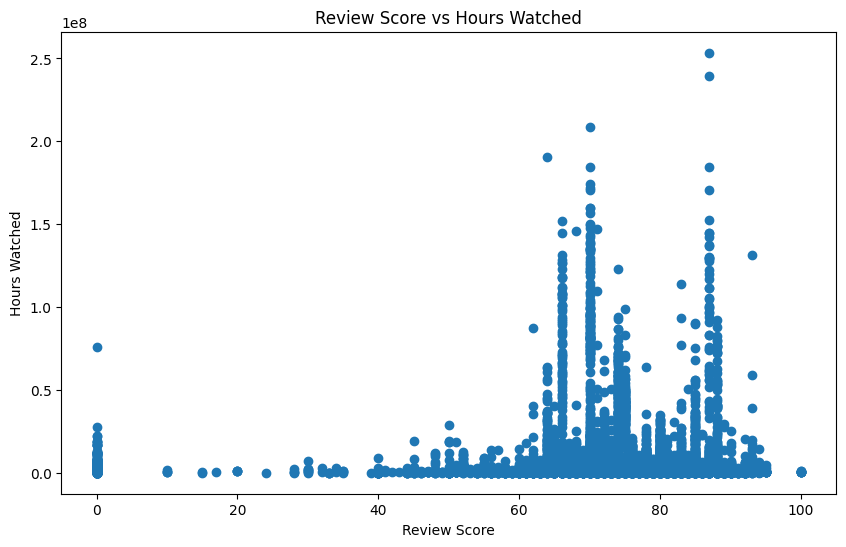

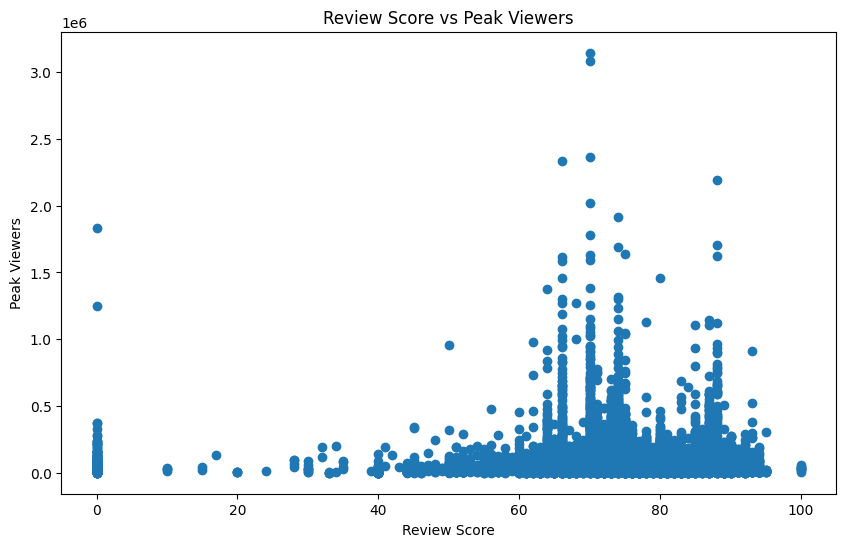

In [556]:
import matplotlib.pyplot as plt

# Create a scatter plot for 'Review_score' vs 'Hours_watched'
plt.figure(figsize=(10,6))
plt.scatter(result['Review_score'], result['Hours_watched'])
plt.title('Review Score vs Hours Watched')
plt.xlabel('Review Score')
plt.ylabel('Hours Watched')
plt.show()

# Create a scatter plot for 'Review_score' vs 'Peak_viewers'
plt.figure(figsize=(10,6))
plt.scatter(result['Review_score'], result['Peak_viewers'])
plt.title('Review Score vs Peak Viewers')
plt.xlabel('Review Score')
plt.ylabel('Peak Viewers')
plt.show()